In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc, font_manager
rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
default_df = pd.read_csv("./data/201901-202003.csv")
print(default_df.shape)
default_df.head()

(24697792, 12)


REG_YYMM CARD_SIDO_NM CARD_CCG_NM STD_CLSS_NM HOM_SIDO_NM HOM_CCG_NM  AGE  \
0    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  20s   
1    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
2    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  30s   
3    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   
4    201901           강원         강릉시  건강보조식품 소매업          강원        강릉시  40s   

   SEX_CTGO_CD  FLC  CSTMR_CNT      AMT  CNT  
0            1    1          4   311200    4  
1            1    2          7  1374500    8  
2            2    2          6   818700    6  
3            1    3          4  1717000    5  
4            1    4          3  1047300    3

In [3]:
df_for_prediction = pd.read_csv("./data/submission.csv")
print(df_for_prediction.shape)
df_for_prediction.head()

(1394, 5)


id  REG_YYMM CARD_SIDO_NM           STD_CLSS_NM  AMT
0   0    202004           강원            건강보조식품 소매업    0
1   1    202004           강원               골프장 운영업    0
2   2    202004           강원           과실 및 채소 소매업    0
3   3    202004           강원     관광 민예품 및 선물용품 소매업    0
4   4    202004           강원  그외 기타 분류안된 오락관련 서비스업    0

# Feature column

In [4]:
default_df.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [5]:
default_df.REG_YYMM.unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003])

In [6]:
default_df.CARD_SIDO_NM.unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [7]:
default_df.CARD_CCG_NM.unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광주시',
       '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시 분당구', '성남시 수정구',
       '성남시 중원구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시',
       '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양평군',
       '여주시', '연천군', '오산시', '용인시 기흥구', '용인시 수지구', '용인시 처인구', '의왕시',
       '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군',
       '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시', '의령군', '진주시', '창녕군',
       '창원시 마산합포구', '창원시 마산회원구', '창원시 성산구', '창원시 의창구', '창원시 진해구', '통영시',
       '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군', '구미시', '군위군',
       '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시',
       '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시 남구',
       '포항시 북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구', '중구',
      

In [8]:
default_df.STD_CLSS_NM.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

In [9]:
default_df.HOM_SIDO_NM.unique()

array(['강원', '경기', '서울', '경남', '경북', '대구', '대전', '세종', '인천', '충남', '충북',
       '광주', '부산', '울산', '전남', '전북', '제주'], dtype=object)

In [10]:
default_df.HOM_CCG_NM.unique()

array(['강릉시', '속초시', '동해시', '춘천시', '평창군', '성남시 분당구', '안산시 단원구', '용인시 기흥구',
       '용인시 수지구', '강남구', '영월군', '원주시', '정선군', '홍천군', '횡성군', '가평군',
       '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광명시', '광주시', '구리시', '군포시',
       '김포시', '남양주시', '부천시', '성남시 수정구', '성남시 중원구', '수원시 권선구', '수원시 영통구',
       '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 상록구', '안성시', '안양시 동안구',
       '안양시 만안구', '양주시', '양평군', '여주시', '오산시', '용인시 처인구', '의왕시', '의정부시',
       '이천시', '파주시', '평택시', '포천시', '하남시', '화성시', '창원시 성산구', '상주시',
       '포항시 남구', '달서구', '대덕구', '서구', '유성구', '강동구', '강북구', '강서구', '관악구',
       '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',
       '중구', '중랑구', nan, '계양구', '남구', '남동구', '부평구', '연수구', '아산시',
       '천안시 동남구', '천안시 서북구', '괴산군', '제천시', '진천군', '청주시 상당구', '청주시 청원구',
       '청주시 흥덕구', '충주시', '포항시 북구', '북구', '고성군', '삼척시', '양양군', '인제군',
       '태백시', '김해시', '양산시', '창원시 마산합포구', '창원시 진해구', '경산시', '경주시', '구미시',
       '안동시', '울

In [11]:
default_df.AGE.unique()

array(['20s', '30s', '40s', '50s', '60s', '70s', '10s'], dtype=object)

In [12]:
default_df.FLC.unique()

array([1, 2, 3, 4, 5])

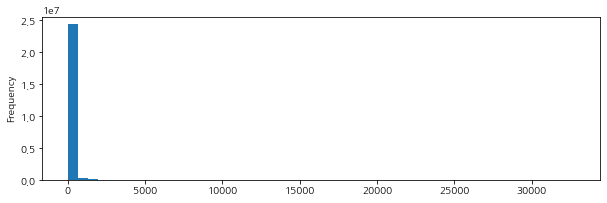

In [13]:
default_df.CSTMR_CNT.plot(kind='hist',bins=50, figsize=(10,3))

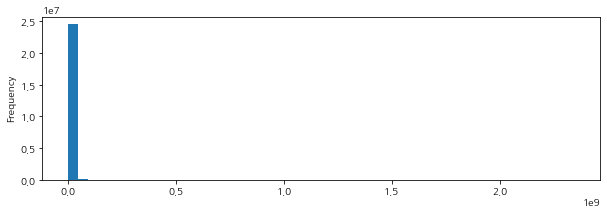

In [14]:
default_df.AMT.plot(kind='hist',bins=50, figsize=(10,3))

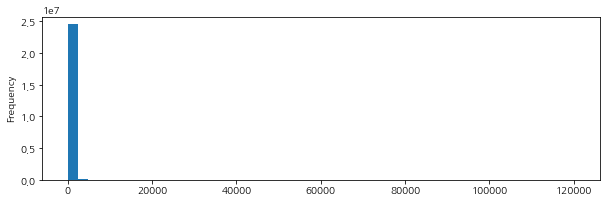

In [15]:
default_df.CNT.plot(kind='hist',bins=50, figsize=(10,3))

In [16]:
print("Mean of CSTMR_CNT : {} AMT : {} CNT : {}".format(default_df.CSTMR_CNT.mean(), \
                                                        default_df.AMT.mean(), \
                                                        default_df.CNT.mean()))

Mean of CSTMR_CNT : 61.96854913184142 AMT : 2441352.9375017006 CNT : 126.04497268419784


# Trend Analysis

In [17]:
sum_trend=default_df[['REG_YYMM','CSTMR_CNT','AMT','CNT']].groupby(['REG_YYMM']).sum()
mean_trend=default_df[['REG_YYMM','CSTMR_CNT','AMT','CNT']].groupby(['REG_YYMM']).mean()
for_count_trend = default_df[['REG_YYMM','CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM',\
                              'HOM_SIDO_NM','HOM_CCG_NM','AGE','SEX_CTGO_CD','CSTMR_CNT','AMT','CNT']]

for_count_trend['AMT/CNT'] = for_count_trend['AMT']/for_count_trend['CNT']
for_count_trend['CSTMR_CNT/CNT'] = for_count_trend['CSTMR_CNT']/for_count_trend['CNT']
count_columns = ['CARD_SIDO_NM','STD_CLSS_NM','HOM_SIDO_NM','AGE','SEX_CTGO_CD']

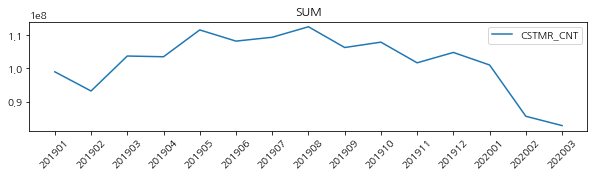

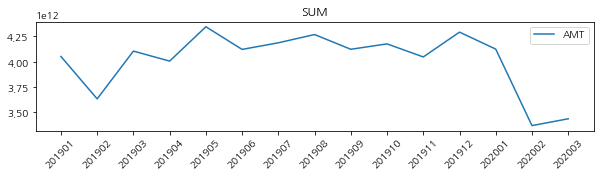

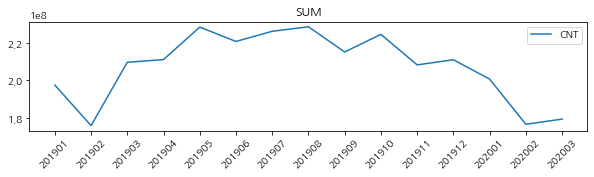

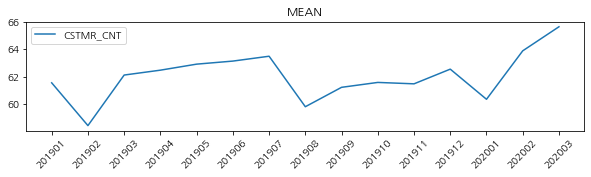

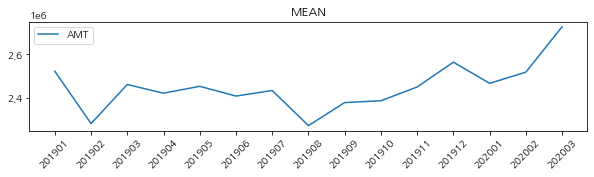

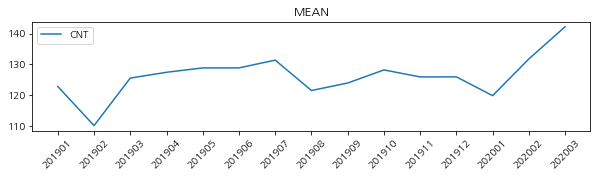

In [18]:
for col in sum_trend.columns:
    fig = plt.figure(figsize=(10,2))
    ax = fig.add_subplot(1,1,1)
    ax.plot(sum_trend.index.values.astype('str'), sum_trend[col].values, label=col)
    ax.legend()
    ax.set_xticklabels(sum_trend.index.values.astype('str'),rotation=45)
    ax.title.set_text('SUM')
    plt.show()
    
for col in mean_trend.columns:
    fig = plt.figure(figsize=(10,2))
    ax = fig.add_subplot(1,1,1)
    ax.plot(mean_trend.index.values.astype('str'), mean_trend[col].values, label=col)
    ax.legend()
    ax.set_xticklabels(mean_trend.index.values.astype('str'),rotation=45)
    ax.title.set_text('MEAN')
    plt.show()

1. (AMT of Mar. ~ Oct.) > (AMT of Nov. ~ Feb.)
2. Big Decrease of AMT in 202002
3. Similar CNT of 201902 with 202002
4. Total amount is similar during (Mar. ~ Oct.)

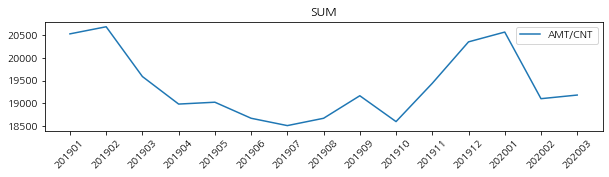

In [19]:
sum_trend['AMT/CNT']=sum_trend['AMT']/sum_trend['CNT']
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
ax.plot(sum_trend.index.values.astype('str'), sum_trend['AMT/CNT'].values, label='AMT/CNT')
ax.legend()
ax.set_xticklabels(sum_trend.index.values.astype('str'),rotation=45)
ax.title.set_text('SUM')
plt.show()

1. Bigger AMT/CNT in winter than others
2. Can use for weight
3. Need to adjustment(But I think that trend can repersent recovery because of 202003)
4. But total count is decrease....

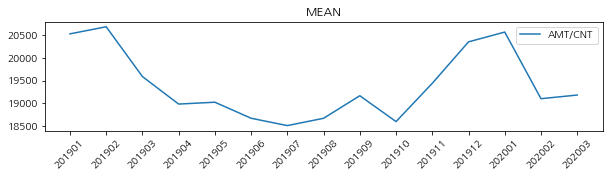

In [20]:
mean_trend['AMT/CNT']=mean_trend['AMT']/mean_trend['CNT']
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
ax.plot(mean_trend.index.values.astype('str'), mean_trend['AMT/CNT'].values, label='AMT/CNT')
ax.legend()
ax.set_xticklabels(mean_trend.index.values.astype('str'),rotation=45)
ax.title.set_text('MEAN')
plt.show()

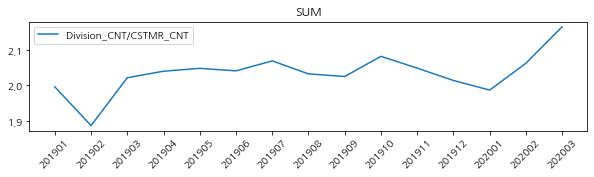

In [21]:
sum_trend['Division_CNT/CSTMR_CNT'] = sum_trend['CNT'] / sum_trend['CSTMR_CNT']
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
ax.plot(sum_trend.index.values.astype('str'), sum_trend['Division_CNT/CSTMR_CNT'].values, label='Division_CNT/CSTMR_CNT')
ax.legend()
ax.set_xticklabels(sum_trend.index.values.astype('str'),rotation=45)
ax.title.set_text('SUM')
plt.show()

1. It can be represent purchase count by one 1 people...
2. normaly 2 times? to buy?? hm.....
3. but not that much big difference during year

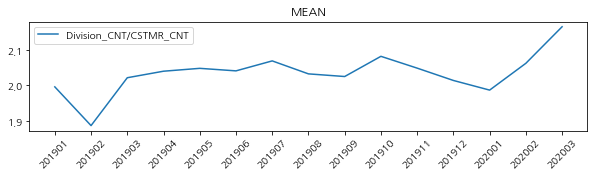

In [22]:
mean_trend['Division_CNT/CSTMR_CNT'] = mean_trend['CNT'] / mean_trend['CSTMR_CNT']
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
ax.plot(mean_trend.index.values.astype('str'), mean_trend['Division_CNT/CSTMR_CNT'].values, label='Division_CNT/CSTMR_CNT')
ax.legend()
ax.set_xticklabels(mean_trend.index.values.astype('str'),rotation=45)
ax.title.set_text('MEAN')
plt.show()

# Count Columns

## By CSTMR_CNT

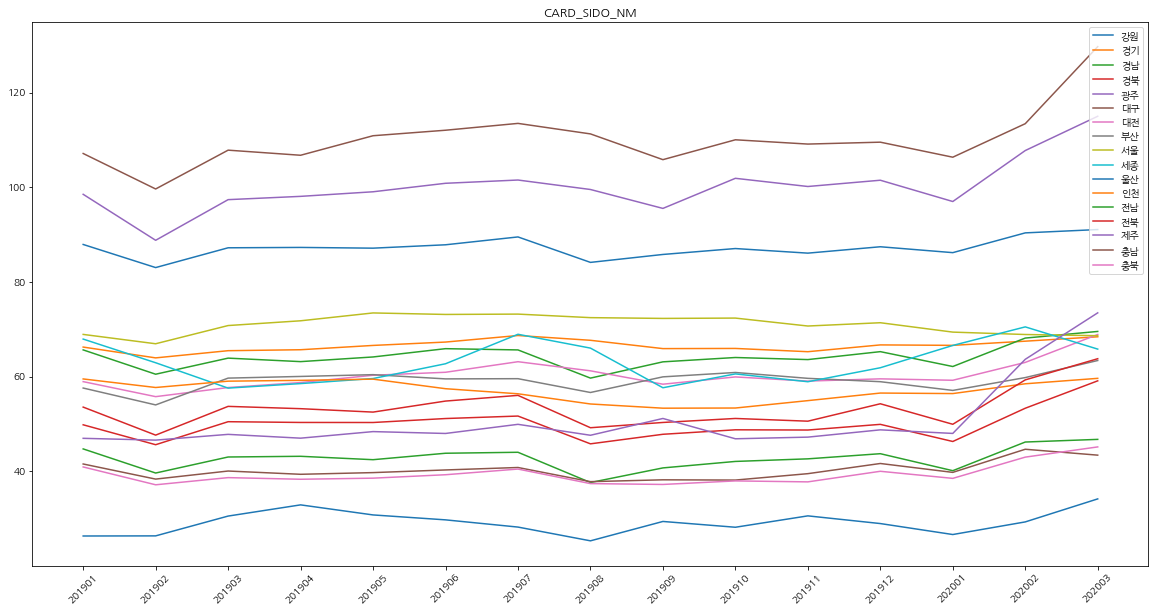

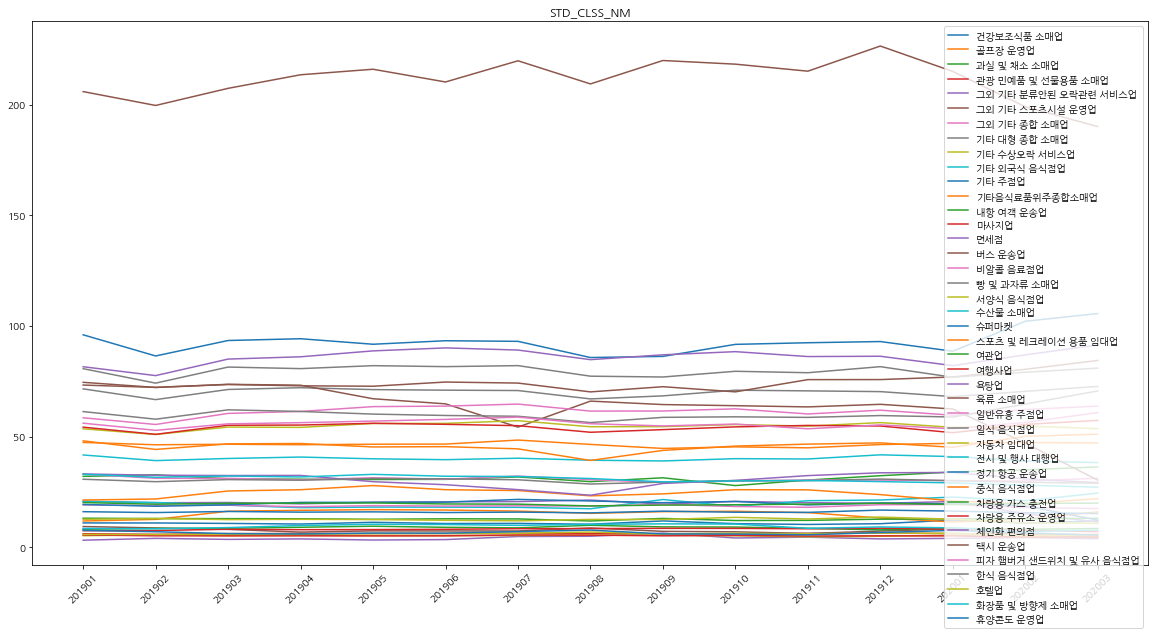

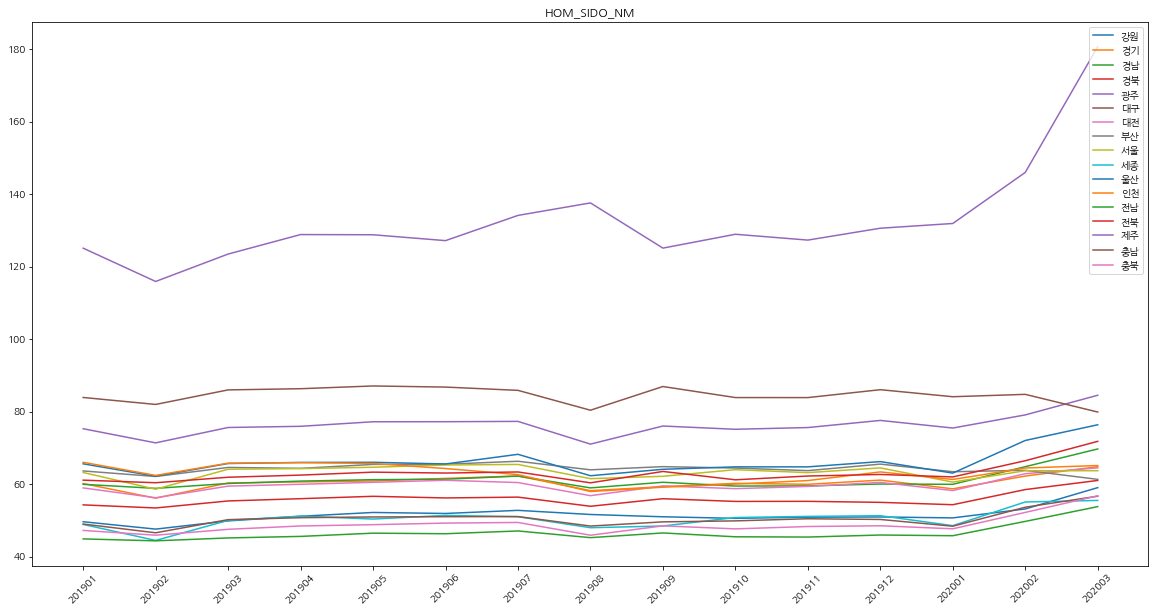

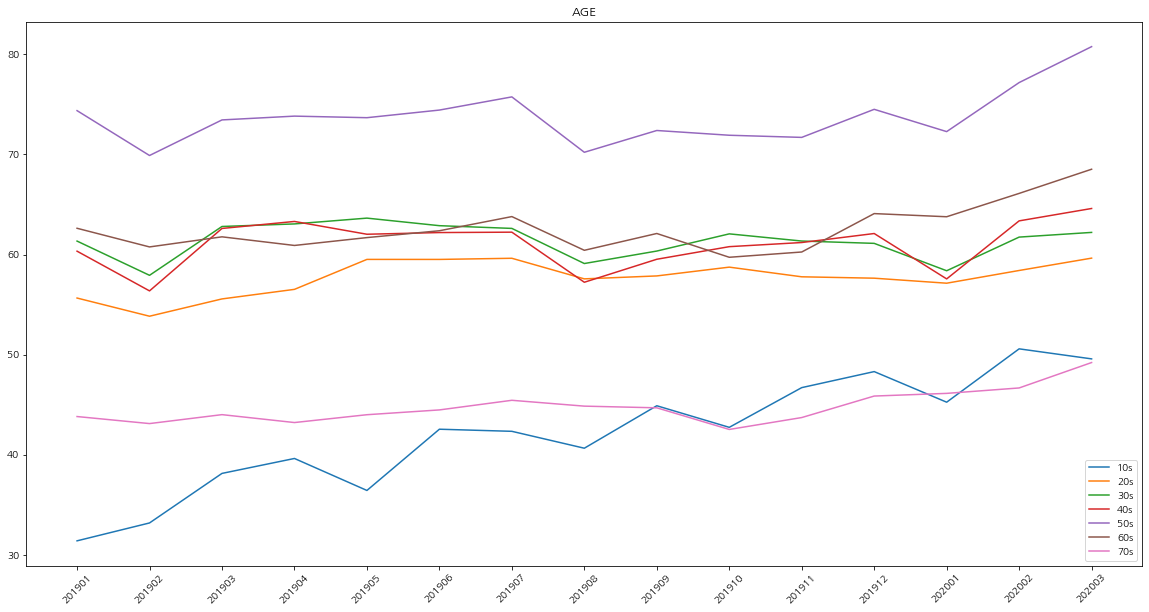

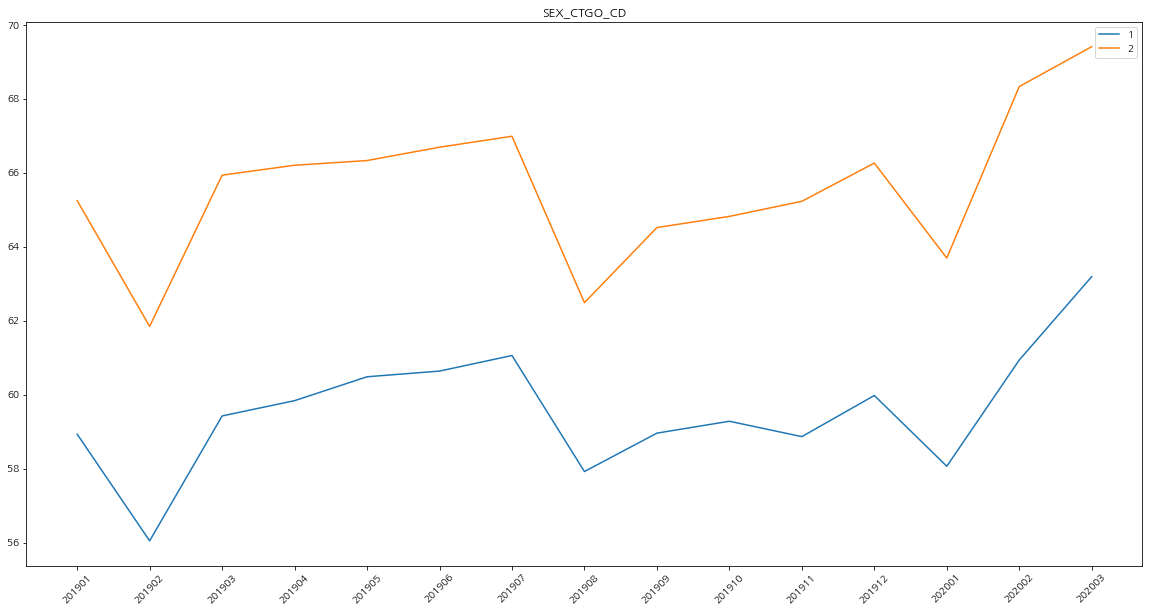

In [23]:
for col in count_columns:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    tmf_data = for_count_trend[['REG_YYMM',col,'CSTMR_CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1)
    for col_idx2 in tmf_data:
        se = tmf_data[col_idx2]
        ax.plot(se.index.values.astype('str'), se.values, label=col_idx2[1])
        ax.legend()
        ax.set_xticklabels(se.index.values.astype('str'),rotation=45)
    ax.title.set_text(col)
    plt.show()

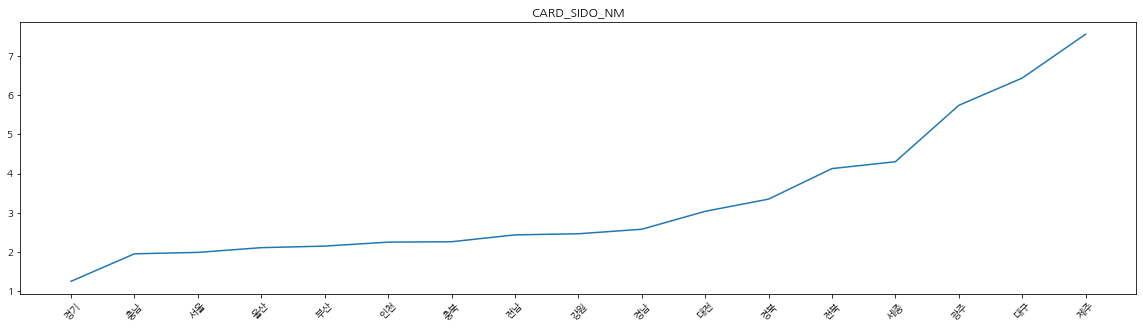

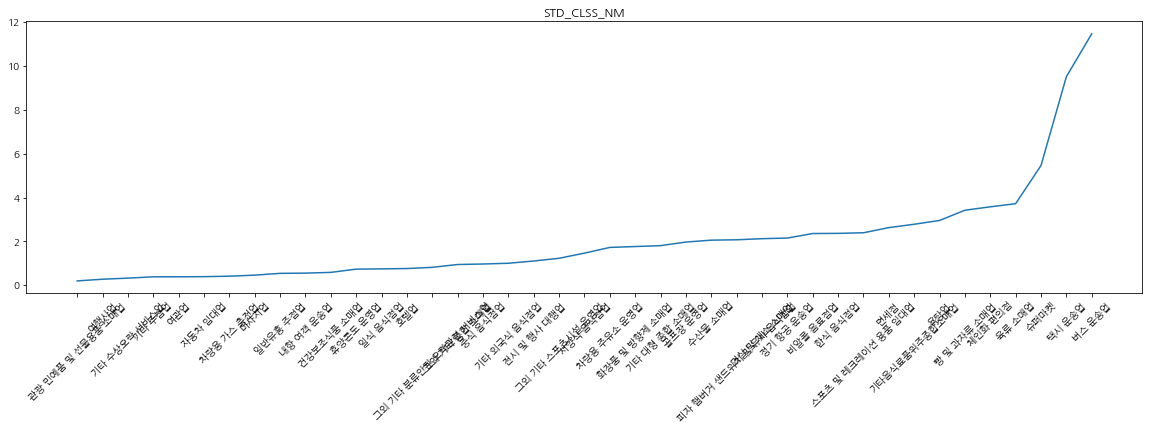

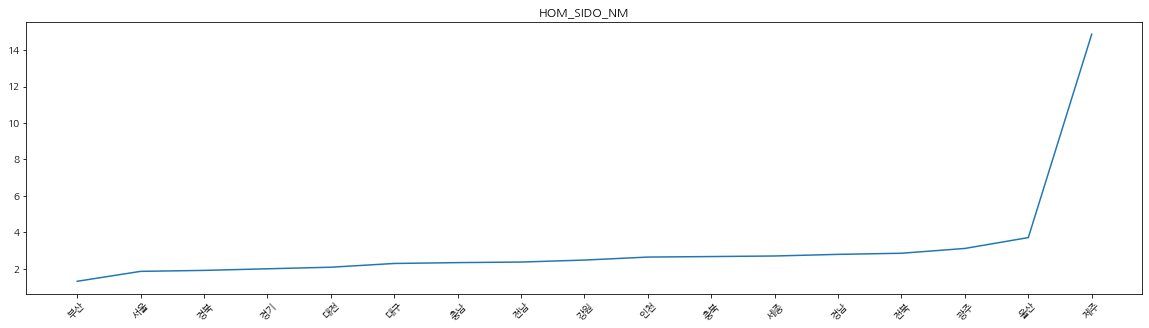

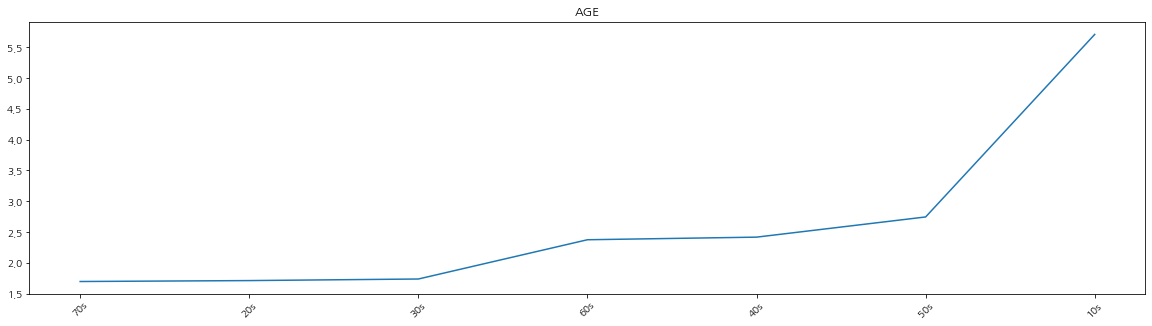

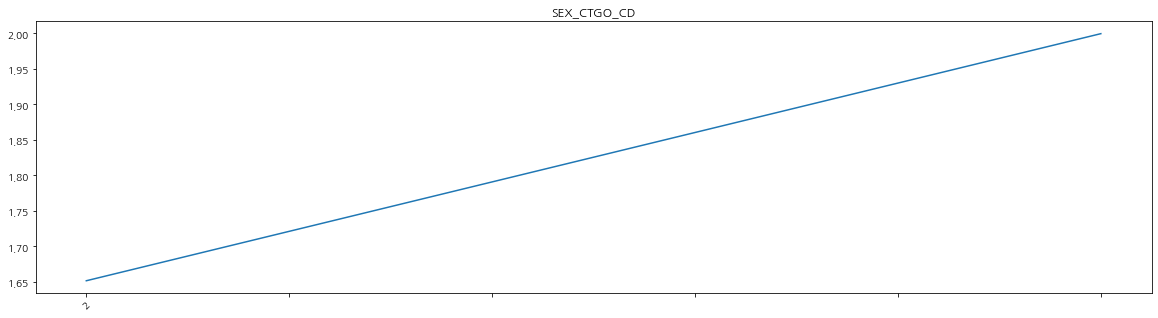

In [24]:
# Standard deviation (use data = pivot table index=Date columns=feature attribute)
# bigger standard deviation -> big change (by date)
for col in count_columns:
    tmp_data = for_count_trend[['REG_YYMM',col,'CSTMR_CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1).std(axis=0).sort_values()
    idx_arr = np.array([x[1] for x in tmp_data.index.values])
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(idx_arr,tmp_data.values)
    ax.set_xticklabels(idx_arr,rotation=45)
    ax.title.set_text(col)
    plt.show()
    

1. Big difference in standard deviation each attribute of feature
2. Promotion? there must be other factor....

In [25]:
# For accuracy
for_count_trend[['REG_YYMM','STD_CLSS_NM','CSTMR_CNT']].groupby(['REG_YYMM','STD_CLSS_NM']).mean().unstack(level=1).std(axis=0).sort_values()

           STD_CLSS_NM          
CSTMR_CNT  관광 민예품 및 선물용품 소매업         0.195593
           여행사업                      0.273086
           기타 수상오락 서비스업              0.322637
           기타 주점업                    0.382355
           여관업                       0.383323
           자동차 임대업                   0.390386
           차량용 가스 충전업                0.410879
           마사지업                      0.458836
           일반유흥 주점업                  0.541392
           내항 여객 운송업                 0.550597
           건강보조식품 소매업                0.584859
           휴양콘도 운영업                  0.732973
           일식 음식점업                   0.744185
           호텔업                       0.760160
           그외 기타 분류안된 오락관련 서비스업      0.815516
           그외 기타 종합 소매업              0.944274
           중식 음식점업                   0.966986
           기타 외국식 음식점업               1.001657
           전시 및 행사 대행업               1.104140
           그외 기타 스포츠시설 운영업           1.228499
           서양식 음식점업                  1.463312
 

## By AMT

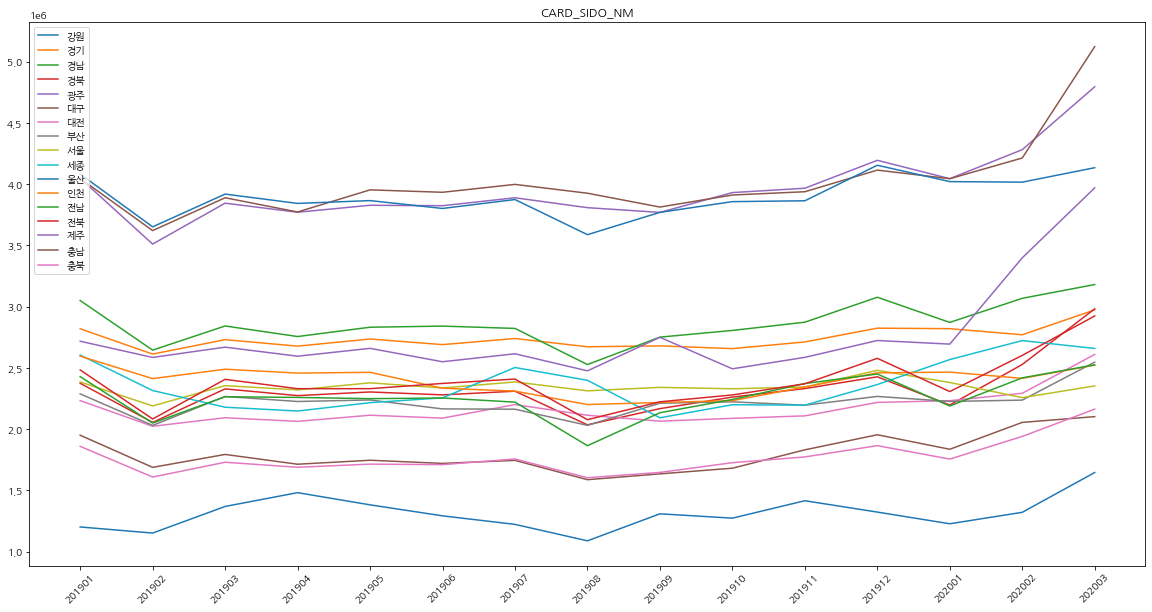

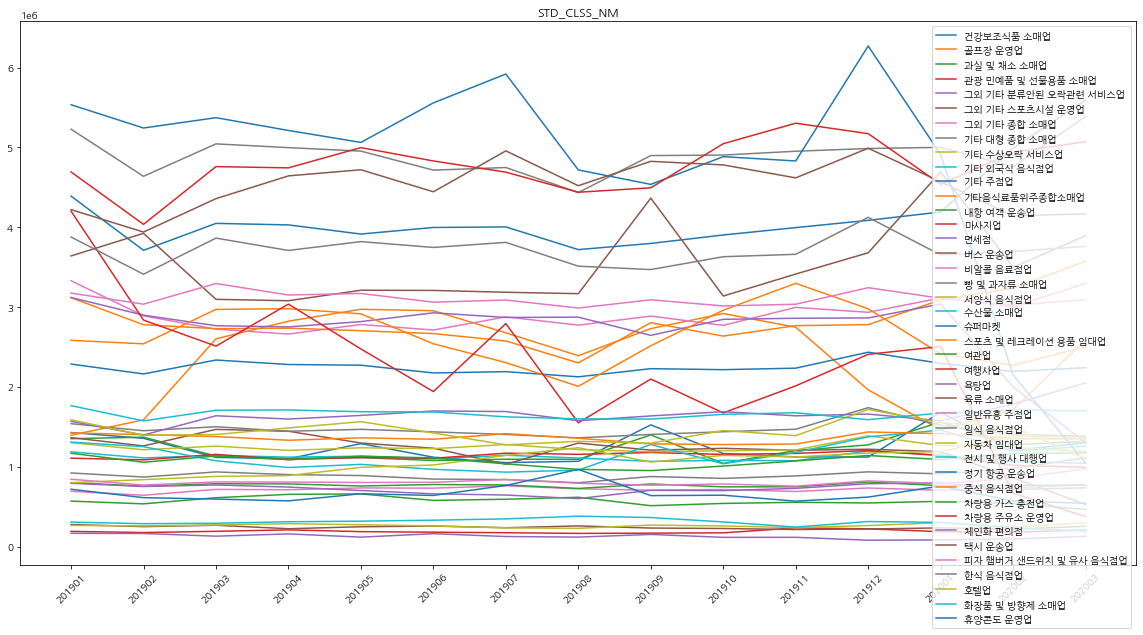

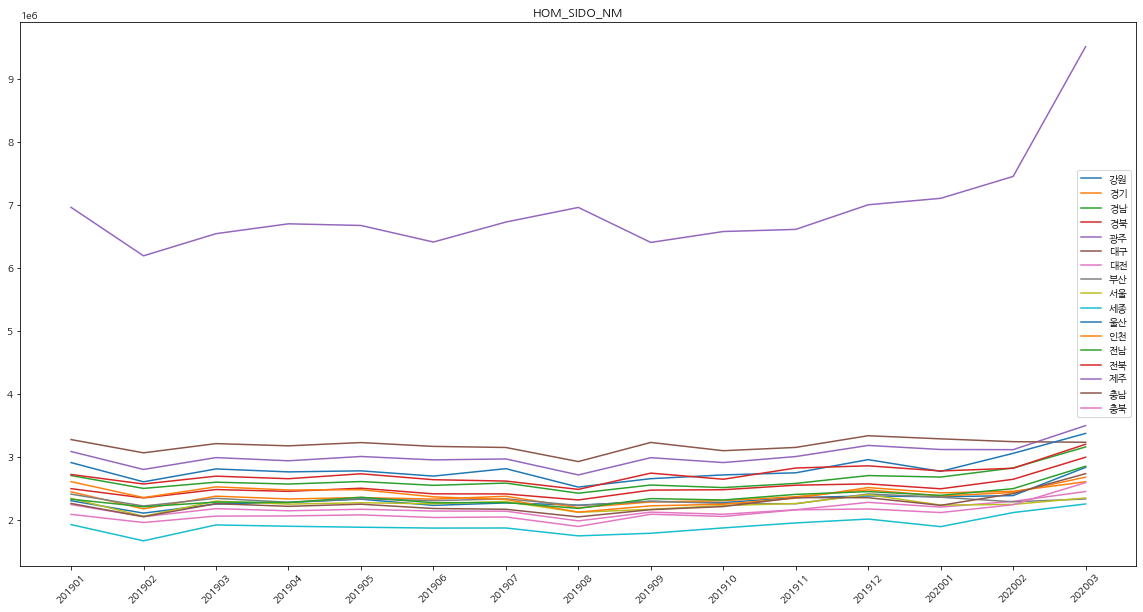

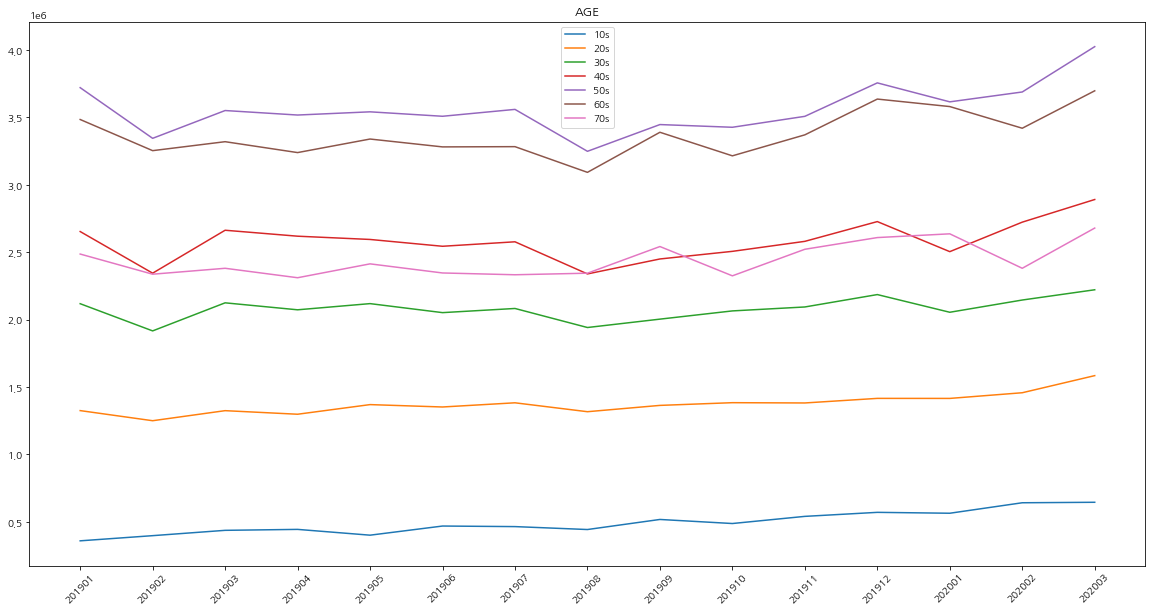

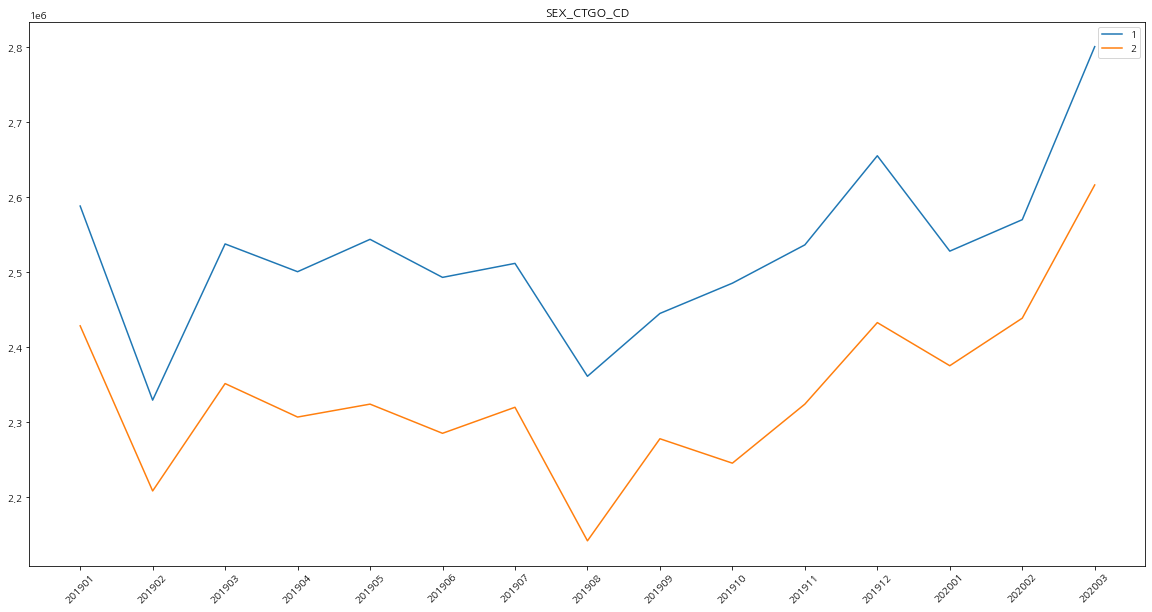

In [26]:
for col in count_columns:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    tmf_data = for_count_trend[['REG_YYMM',col,'AMT']].groupby(['REG_YYMM',col]).mean().unstack(level=1)
    for col_idx2 in tmf_data:
        se = tmf_data[col_idx2]
        ax.plot(se.index.values.astype('str'), se.values, label=col_idx2[1])
        ax.legend()
        ax.set_xticklabels(se.index.values.astype('str'),rotation=45)
    ax.title.set_text(col)
    plt.show()

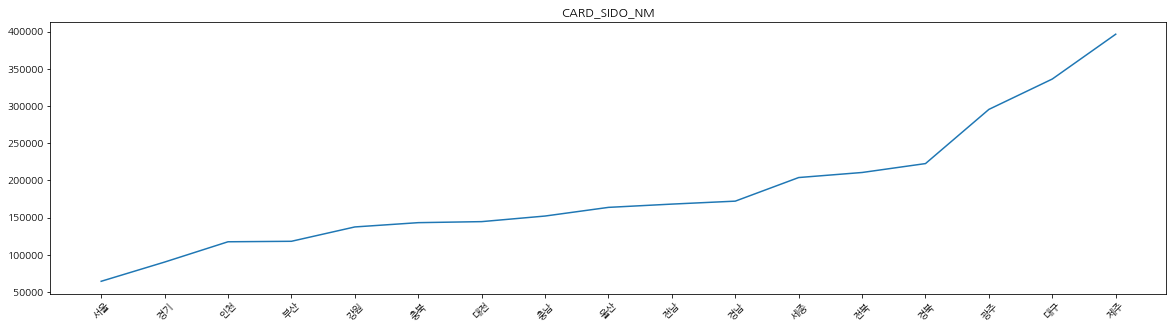

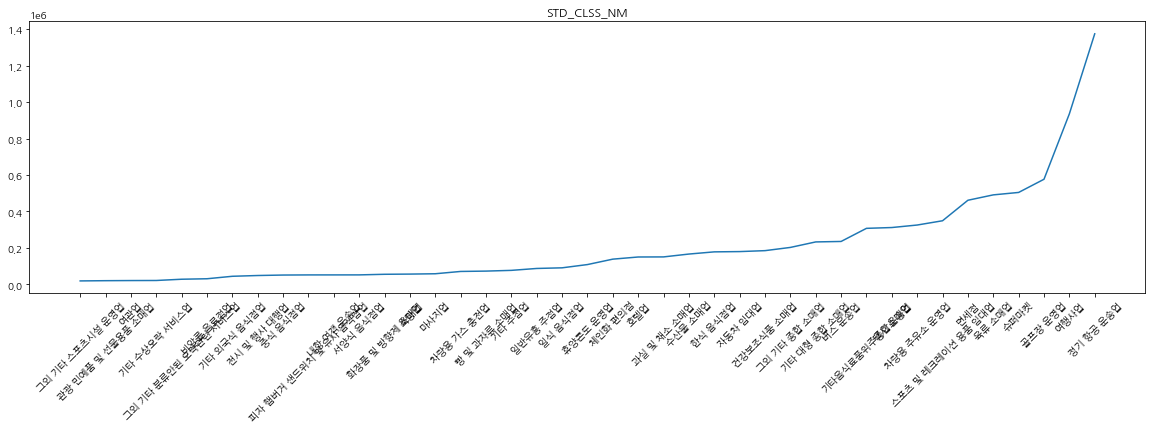

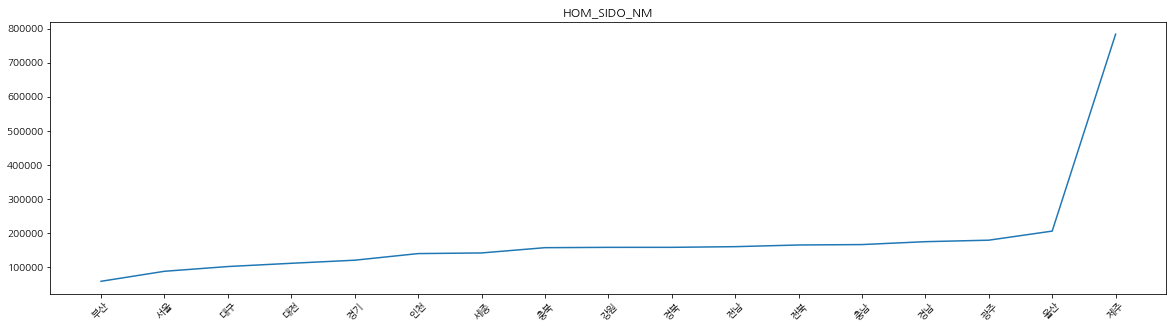

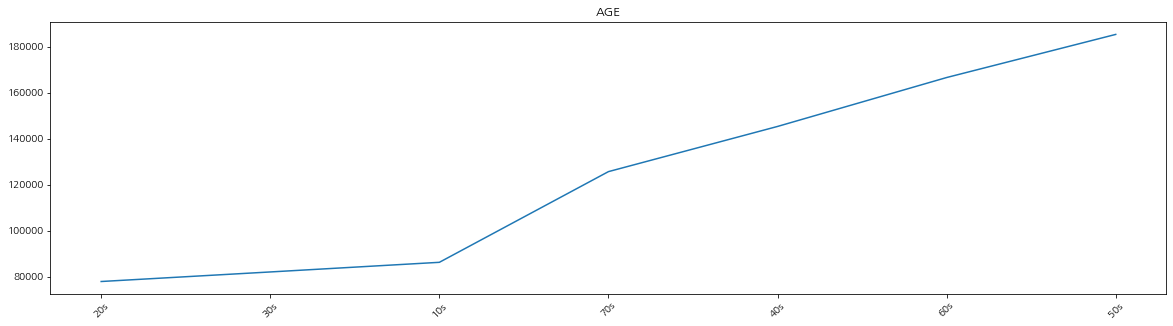

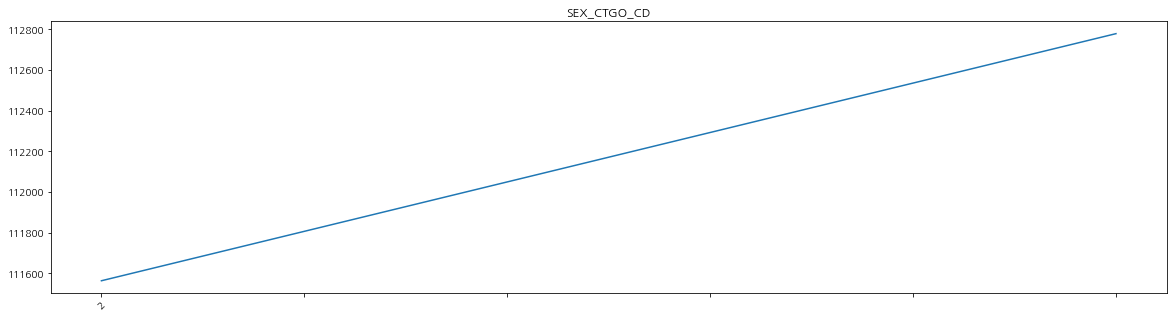

In [27]:
# Standard deviation (use data = pivot table index=Date columns=feature attribute)
# bigger standard deviation -> big change (by date)
for col in count_columns:
    tmp_data = for_count_trend[['REG_YYMM',col,'AMT']].groupby(['REG_YYMM',col]).mean().unstack(level=1).std(axis=0).sort_values()
    idx_arr = np.array([x[1] for x in tmp_data.index.values])
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(idx_arr,tmp_data.values)
    ax.set_xticklabels(idx_arr,rotation=45)
    ax.title.set_text(col)
    plt.show()
    

In [28]:
# For accuracy
for_count_trend[['REG_YYMM','STD_CLSS_NM','AMT']].groupby(['REG_YYMM','STD_CLSS_NM']).mean().unstack(level=1).std(axis=0).sort_values()

     STD_CLSS_NM          
AMT  그외 기타 스포츠시설 운영업          1.909919e+04
     관광 민예품 및 선물용품 소매업        2.035038e+04
     여관업                      2.108391e+04
     기타 수상오락 서비스업             2.146931e+04
     그외 기타 분류안된 오락관련 서비스업     2.832191e+04
     비알콜 음료점업                 3.096729e+04
     기타 외국식 음식점업              4.450560e+04
     전시 및 행사 대행업              4.874765e+04
     중식 음식점업                  5.129577e+04
     피자 햄버거 샌드위치 및 유사 음식점업    5.201062e+04
     내항 여객 운송업                5.207921e+04
     서양식 음식점업                 5.216952e+04
     화장품 및 방향제 소매업            5.548498e+04
     욕탕업                      5.653973e+04
     마사지업                     5.838854e+04
     차량용 가스 충전업               7.106240e+04
     빵 및 과자류 소매업              7.294799e+04
     기타 주점업                   7.698032e+04
     일반유흥 주점업                 8.743092e+04
     일식 음식점업                  9.092193e+04
     휴양콘도 운영업                 1.088065e+05
     체인화 편의점                  1.385168e+05
     호텔업                   

## By CNT

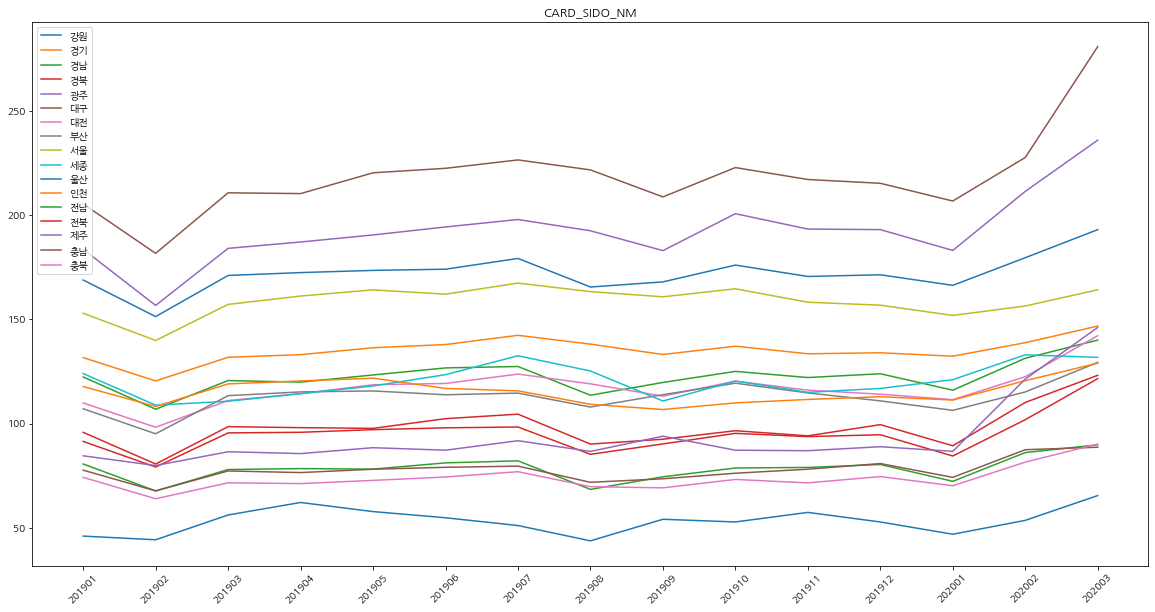

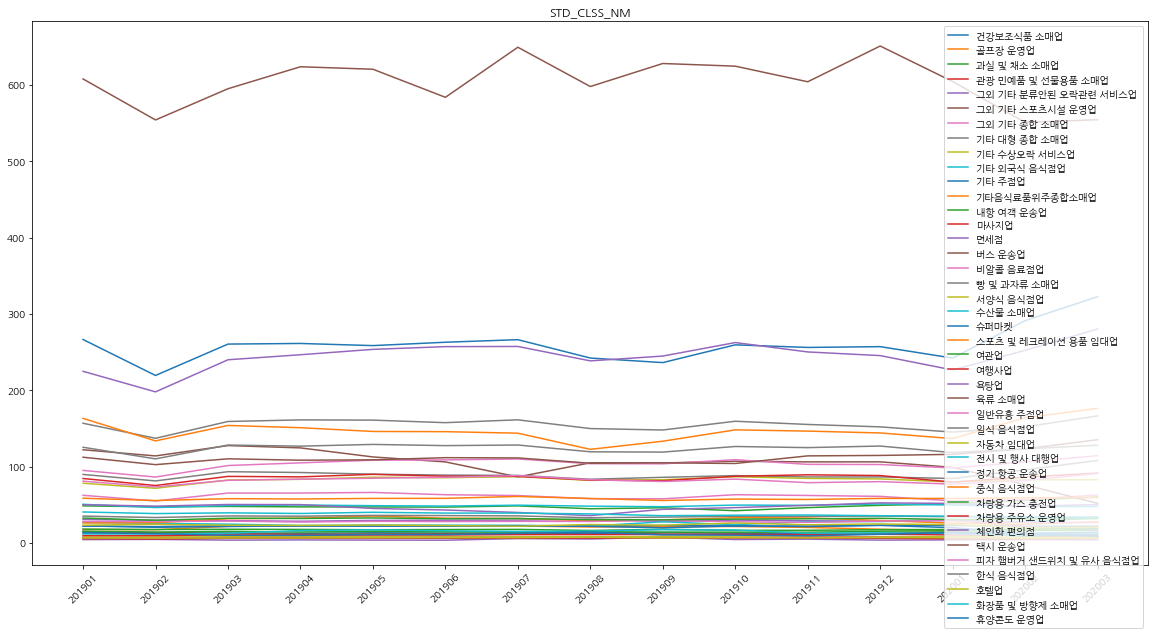

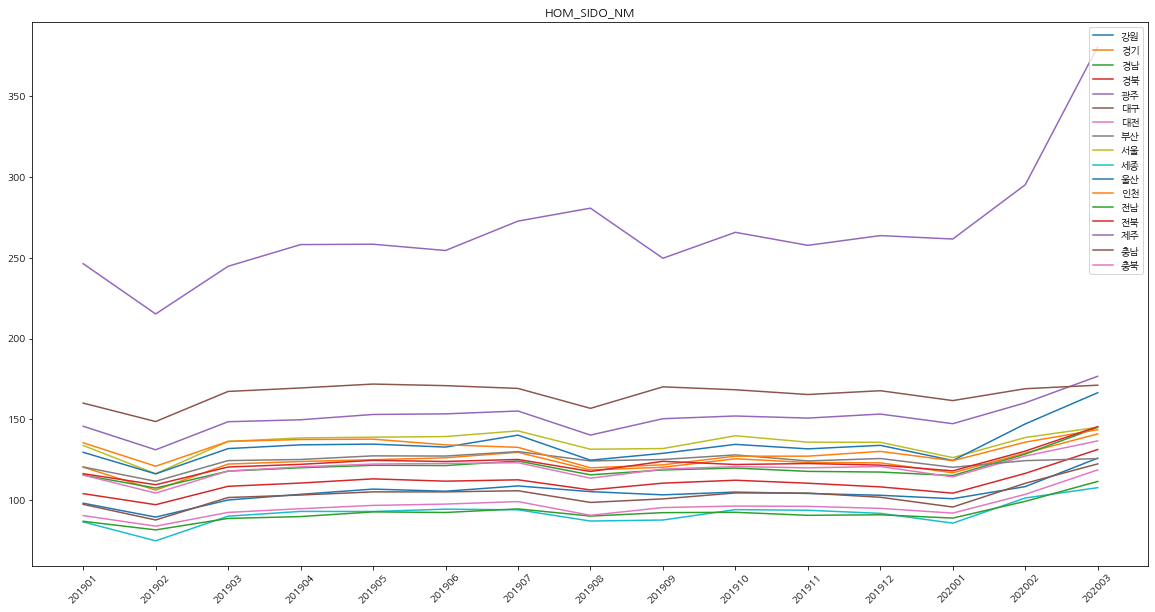

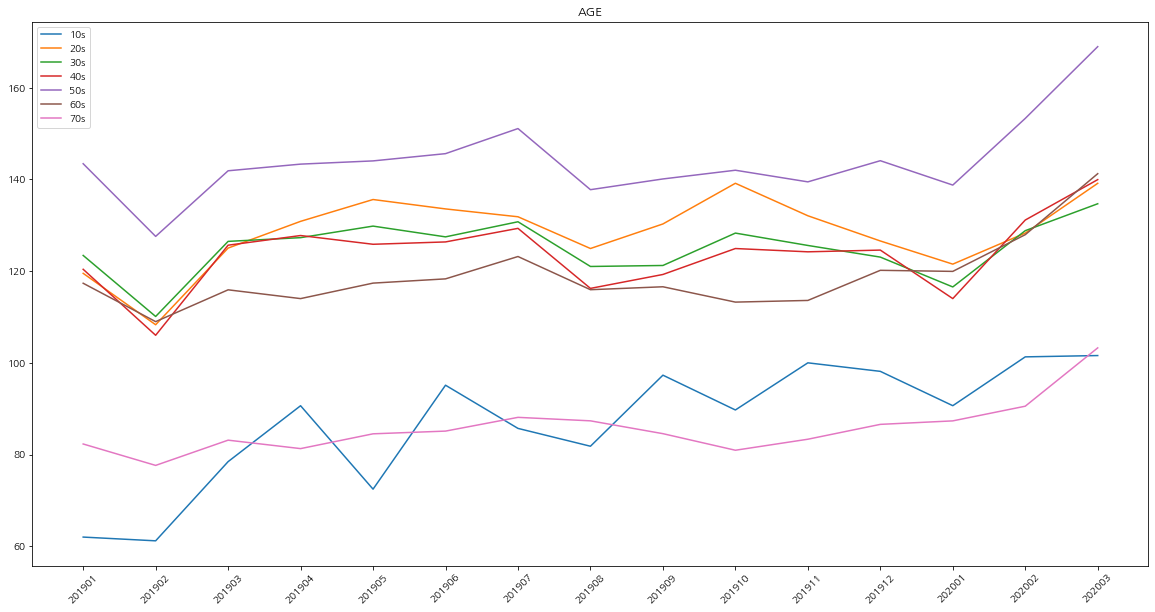

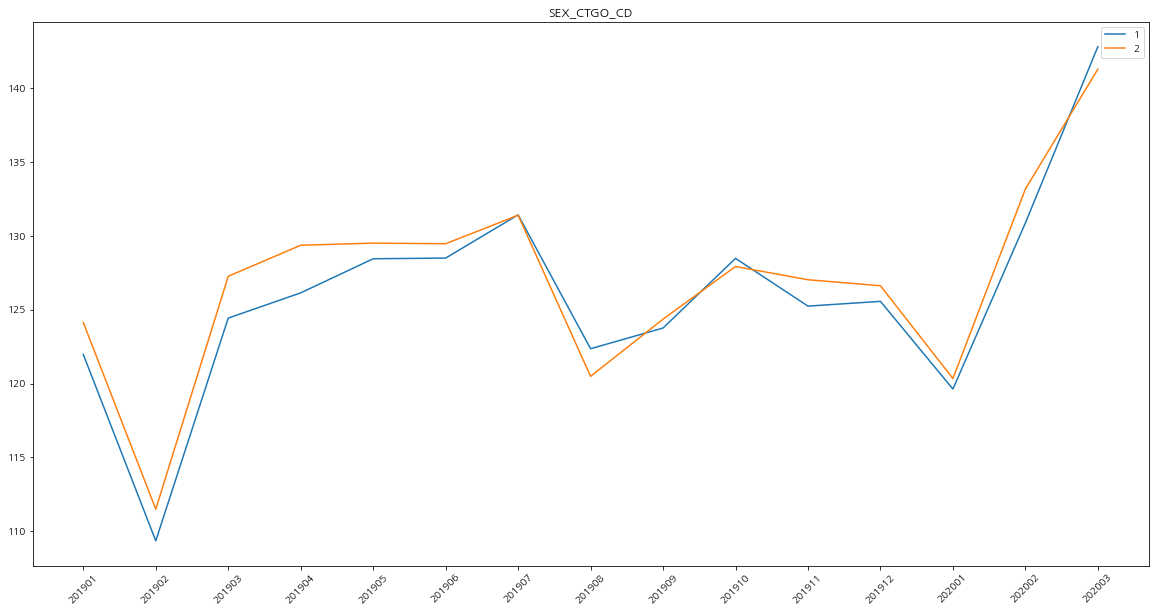

In [29]:
for col in count_columns:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    tmf_data = for_count_trend[['REG_YYMM',col,'CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1)
    for col_idx2 in tmf_data:
        se = tmf_data[col_idx2]
        ax.plot(se.index.values.astype('str'), se.values, label=col_idx2[1])
        ax.legend()
        ax.set_xticklabels(se.index.values.astype('str'),rotation=45)
    ax.title.set_text(col)
    plt.show()

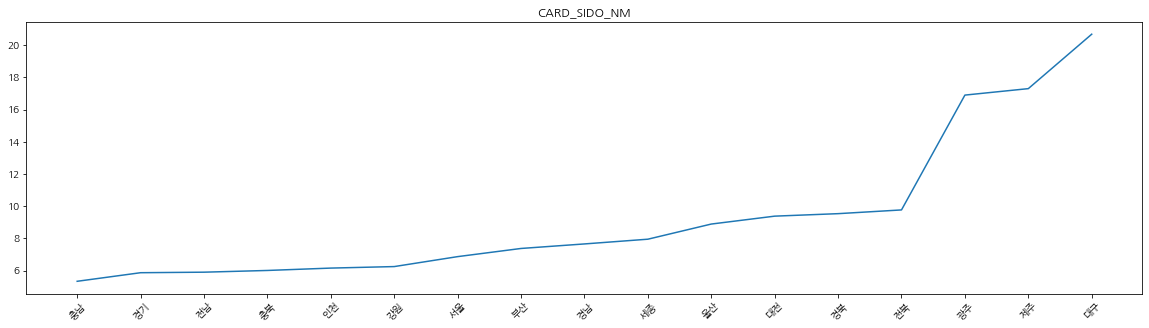

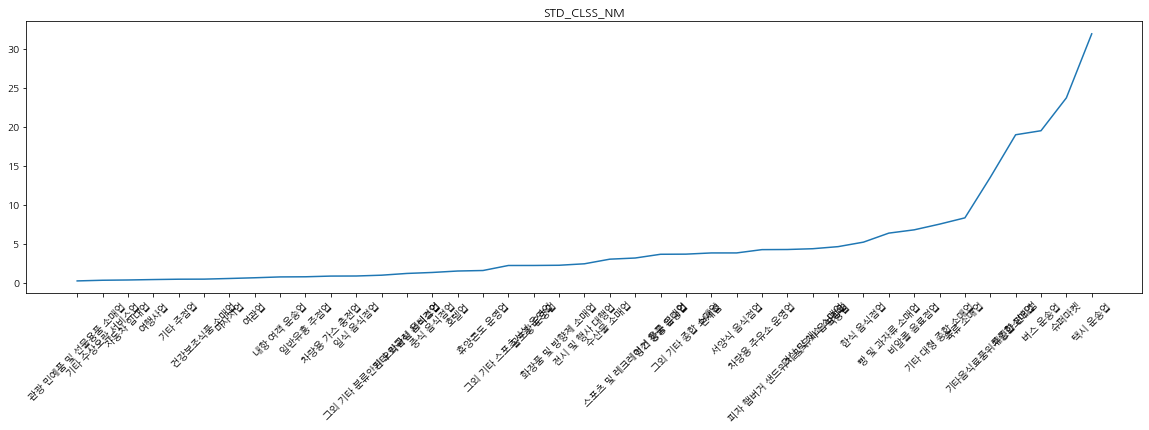

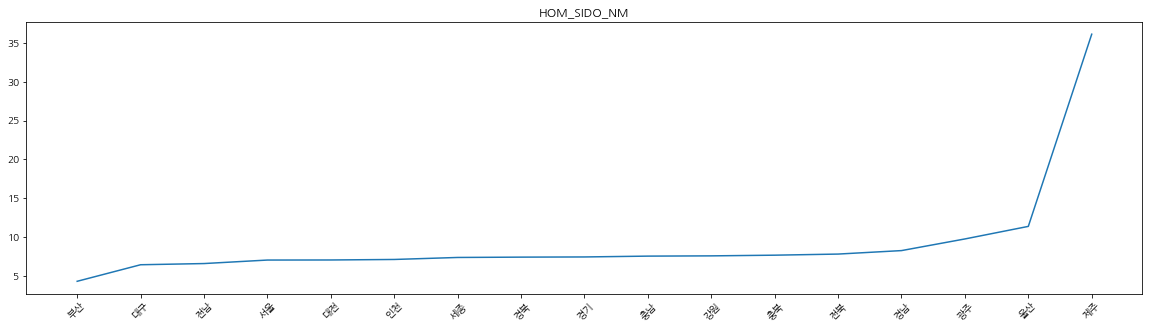

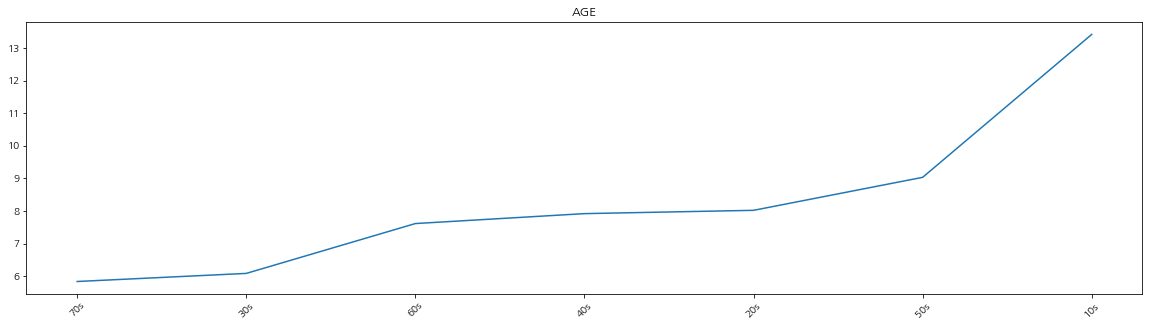

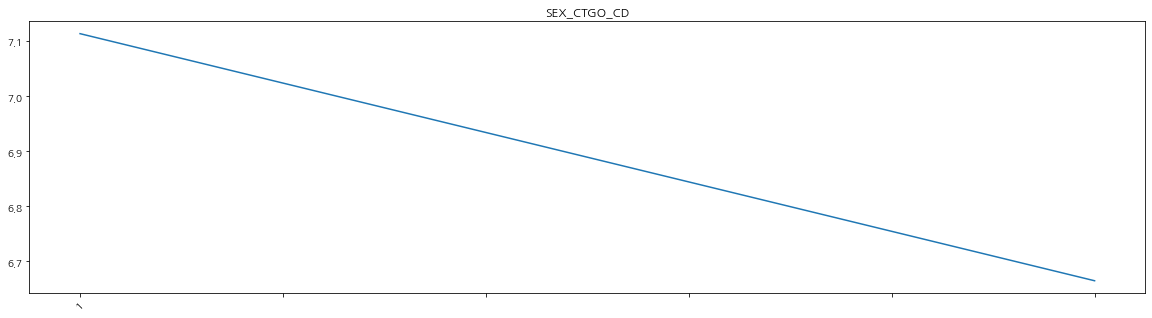

In [30]:
# Standard deviation (use data = pivot table index=Date columns=feature attribute)
# bigger standard deviation -> big change (by date)
for col in count_columns:
    tmp_data = for_count_trend[['REG_YYMM',col,'CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1).std(axis=0).sort_values()
    idx_arr = np.array([x[1] for x in tmp_data.index.values])
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(idx_arr,tmp_data.values)
    ax.set_xticklabels(idx_arr,rotation=45)
    ax.title.set_text(col)
    plt.show()
    

In [31]:
# For accuracy
for_count_trend[['REG_YYMM','STD_CLSS_NM','CNT']].groupby(['REG_YYMM','STD_CLSS_NM']).mean().unstack(level=1).std(axis=0).sort_values()

     STD_CLSS_NM          
CNT  관광 민예품 및 선물용품 소매업         0.292276
     기타 수상오락 서비스업              0.377512
     자동차 임대업                   0.411353
     여행사업                      0.466627
     기타 주점업                    0.510728
     건강보조식품 소매업                0.520019
     마사지업                      0.603518
     여관업                       0.695211
     내항 여객 운송업                 0.802744
     일반유흥 주점업                  0.821104
     차량용 가스 충전업                0.909877
     일식 음식점업                   0.920471
     그외 기타 분류안된 오락관련 서비스업      1.024341
     기타 외국식 음식점업               1.247314
     중식 음식점업                   1.373368
     호텔업                       1.557171
     휴양콘도 운영업                  1.623049
     그외 기타 스포츠시설 운영업           2.264298
     골프장 운영업                   2.267003
     화장품 및 방향제 소매업             2.293459
     전시 및 행사 대행업               2.482006
     수산물 소매업                   3.072163
     스포츠 및 레크레이션 용품 임대업        3.219557
     정기 항공 운송업                 3.697889
     그외 기타 종합

## BY AMT/CNT

Need to compare which is better predicting MT/CNT or AMT (maybee correlation?)

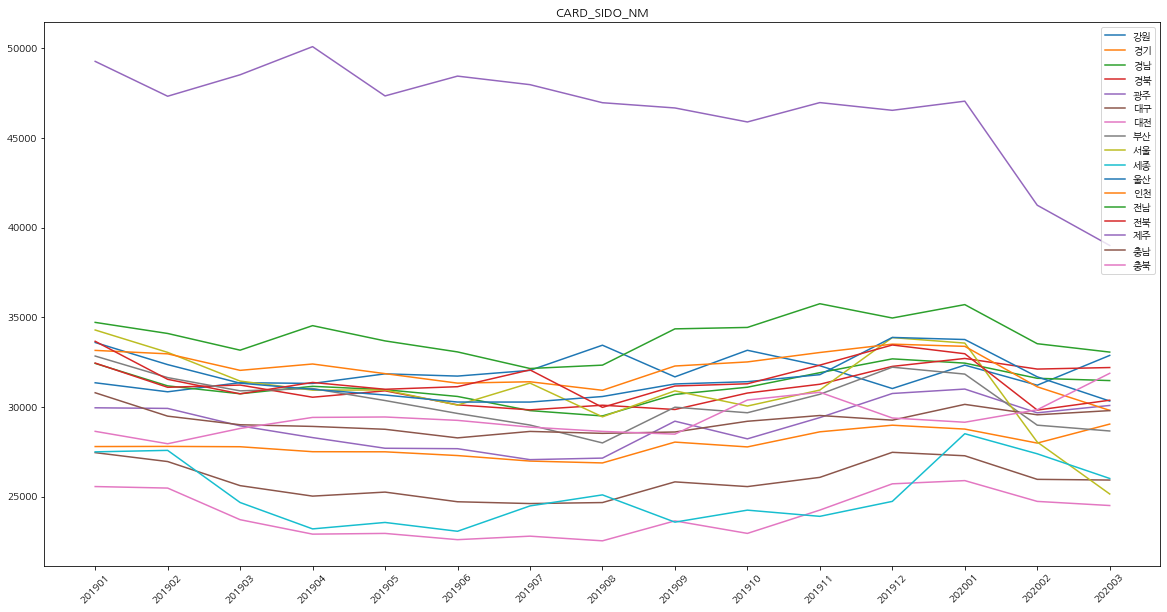

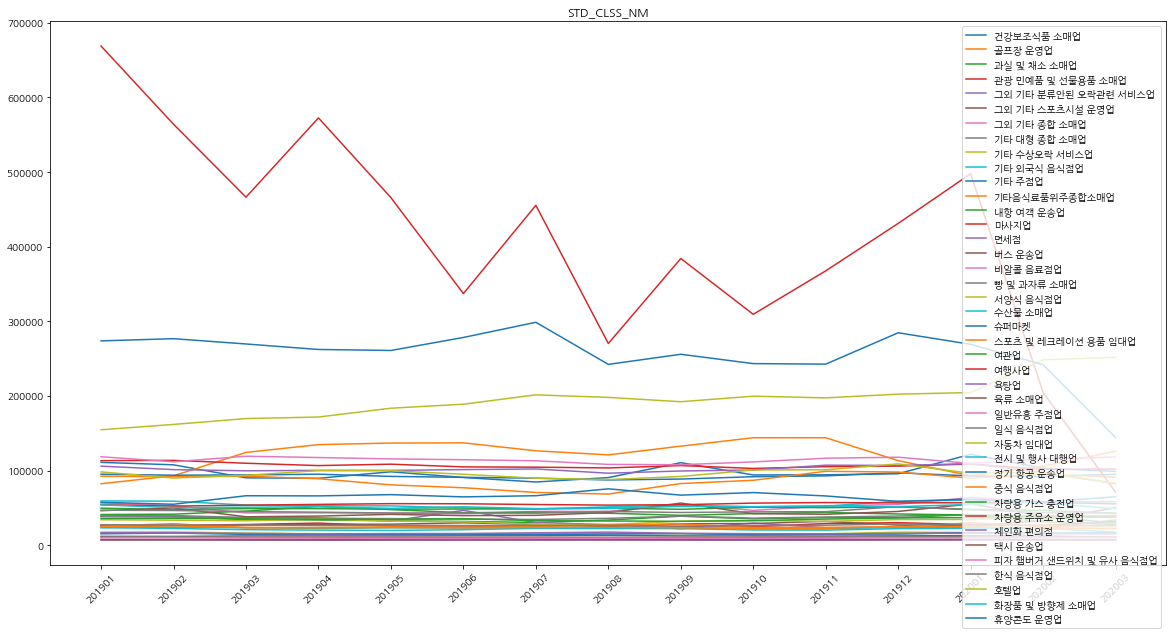

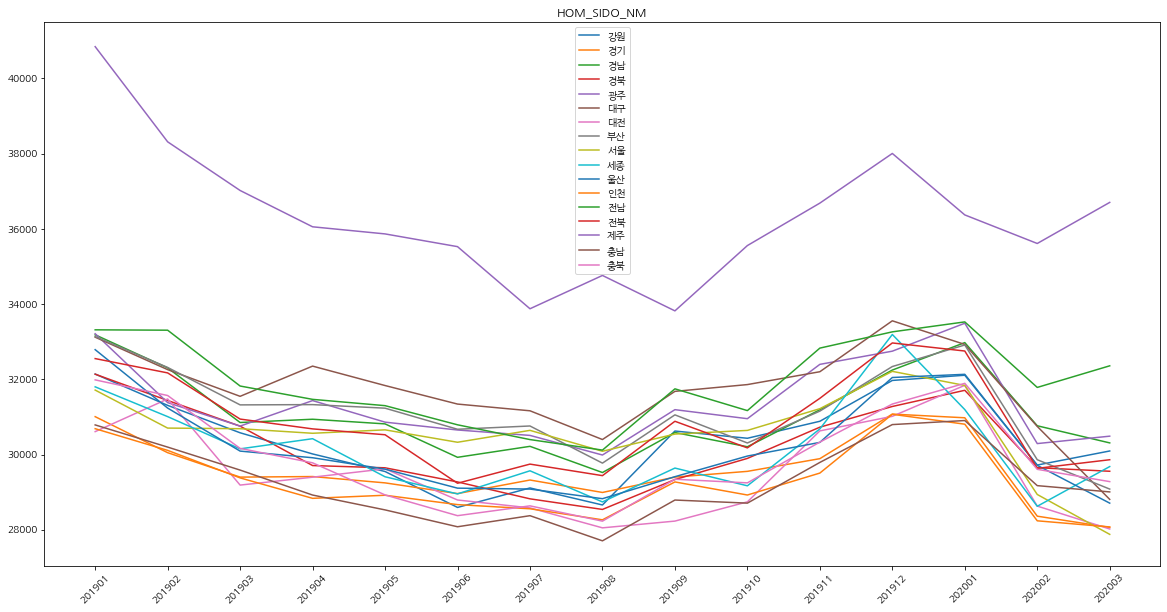

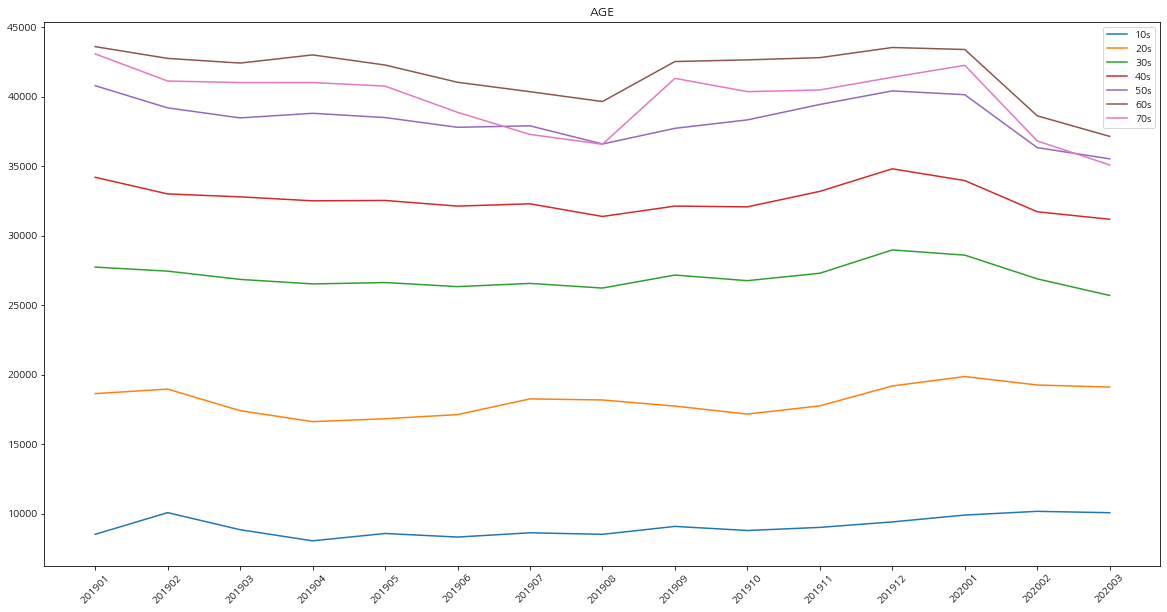

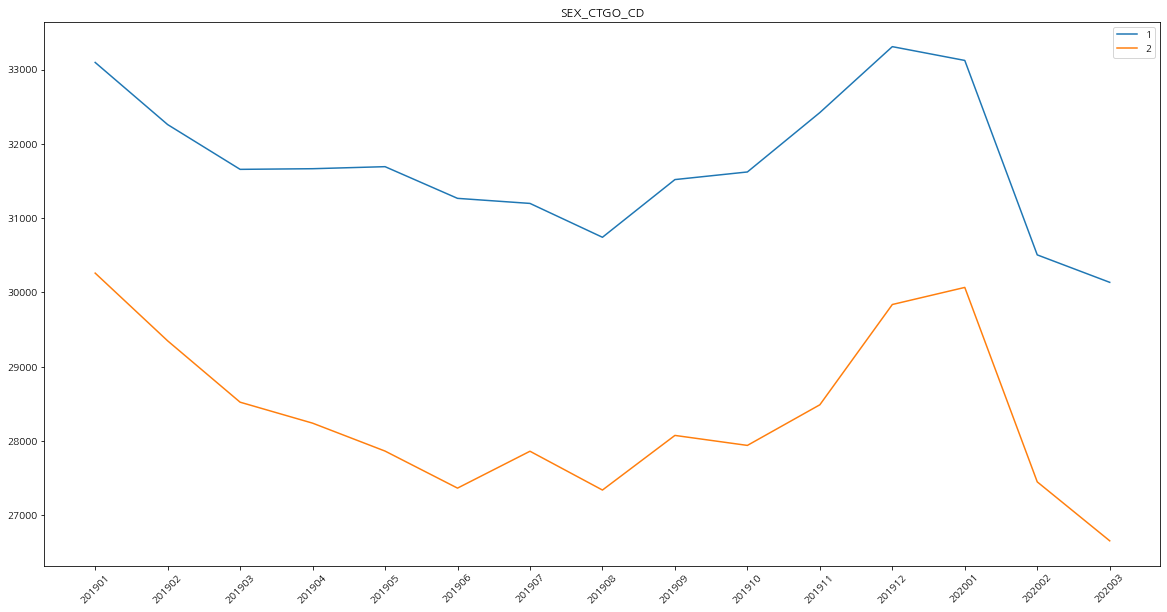

In [32]:
for col in count_columns:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    tmf_data = for_count_trend[['REG_YYMM',col,'AMT/CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1)
    for col_idx2 in tmf_data:
        se = tmf_data[col_idx2]
        ax.plot(se.index.values.astype('str'), se.values, label=col_idx2[1])
        ax.legend()
        ax.set_xticklabels(se.index.values.astype('str'),rotation=45)
    ax.title.set_text(col)
    plt.show()

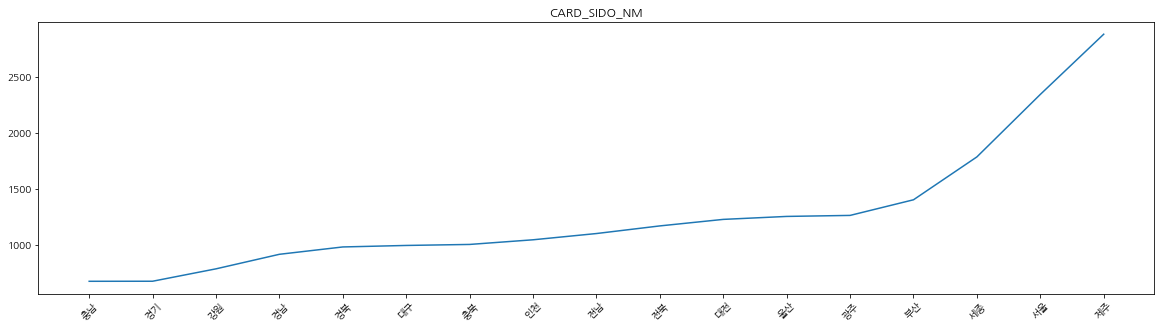

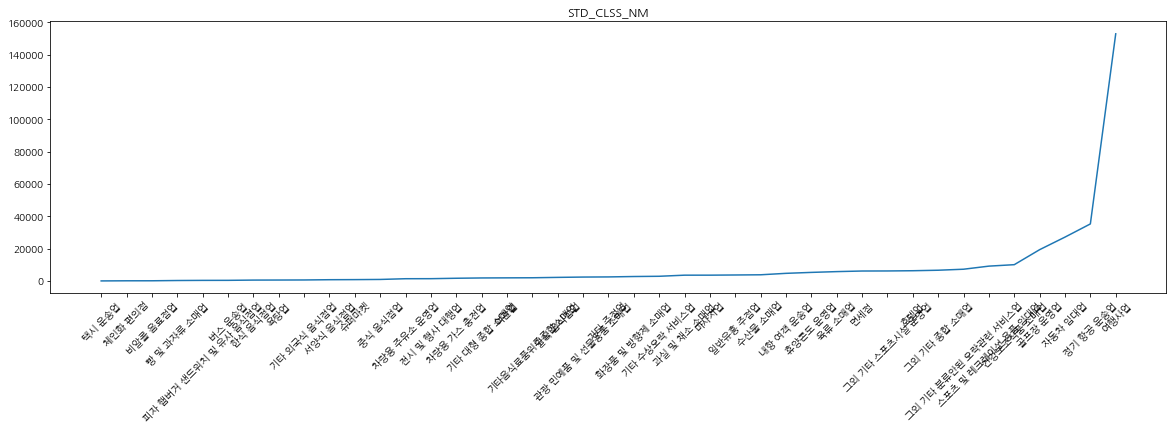

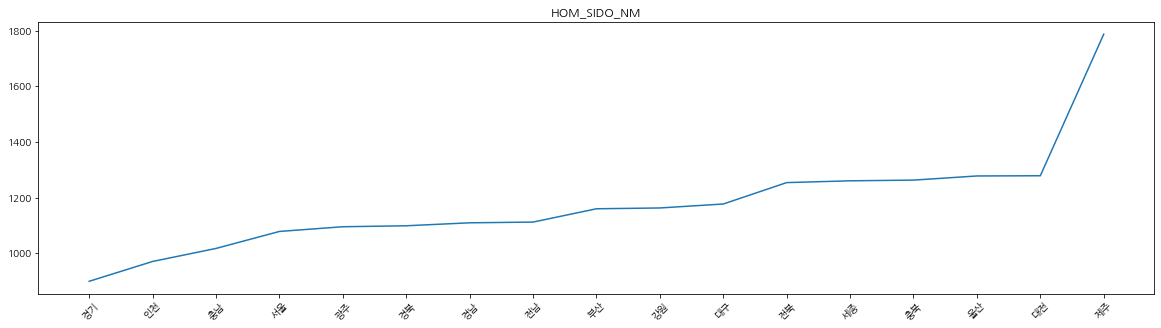

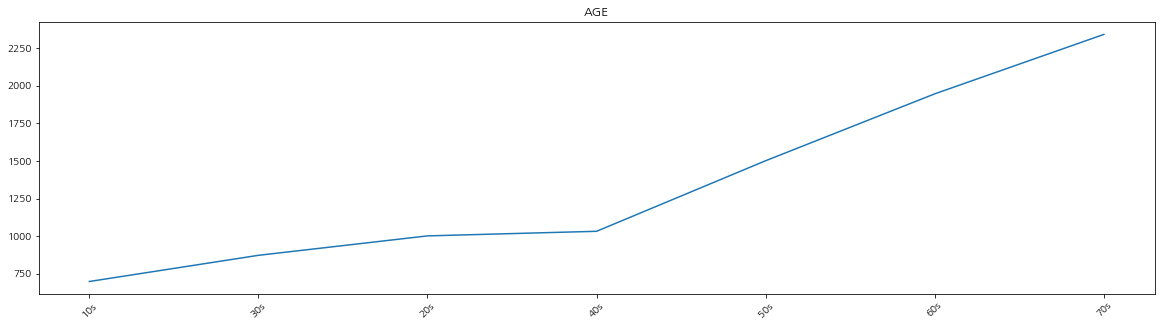

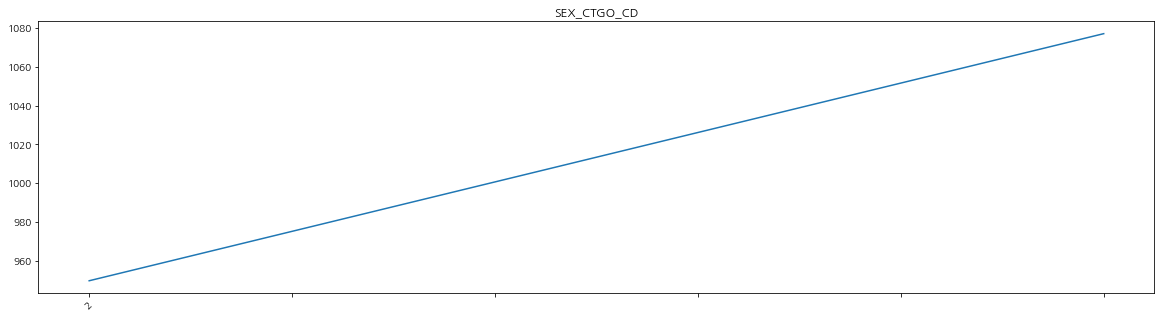

In [33]:
# Standard deviation (use data = pivot table index=Date columns=feature attribute)
# bigger standard deviation -> big change (by date)
for col in count_columns:
    tmp_data = for_count_trend[['REG_YYMM',col,'AMT/CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1).std(axis=0).sort_values()
    idx_arr = np.array([x[1] for x in tmp_data.index.values])
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(idx_arr,tmp_data.values)
    ax.set_xticklabels(idx_arr,rotation=45)
    ax.title.set_text(col)
    plt.show()
    

In [34]:
# For accuracy
for_count_trend[['REG_YYMM','STD_CLSS_NM','AMT/CNT']].groupby(['REG_YYMM','STD_CLSS_NM']).mean().unstack(level=1).std(axis=0).sort_values()

         STD_CLSS_NM          
AMT/CNT  택시 운송업                      145.746431
         체인화 편의점                     221.780163
         비알콜 음료점업                    231.082048
         빵 및 과자류 소매업                 397.543364
         피자 햄버거 샌드위치 및 유사 음식점업       479.446531
         버스 운송업                      503.615846
         한식 음식점업                     656.742858
         욕탕업                         692.051900
         기타 외국식 음식점업                 734.250491
         서양식 음식점업                    892.242842
         슈퍼마켓                        948.598908
         중식 음식점업                    1055.307300
         차량용 주유소 운영업                1502.566175
         전시 및 행사 대행업                1529.146163
         차량용 가스 충전업                 1791.107803
         기타 대형 종합 소매업               1975.351931
         여관업                        2041.497404
         기타음식료품위주종합소매업              2097.749324
         일식 음식점업                    2332.515432
         관광 민예품 및 선물용품 소매업          2530.632320
         

## By CSTMR_CNT/CNT

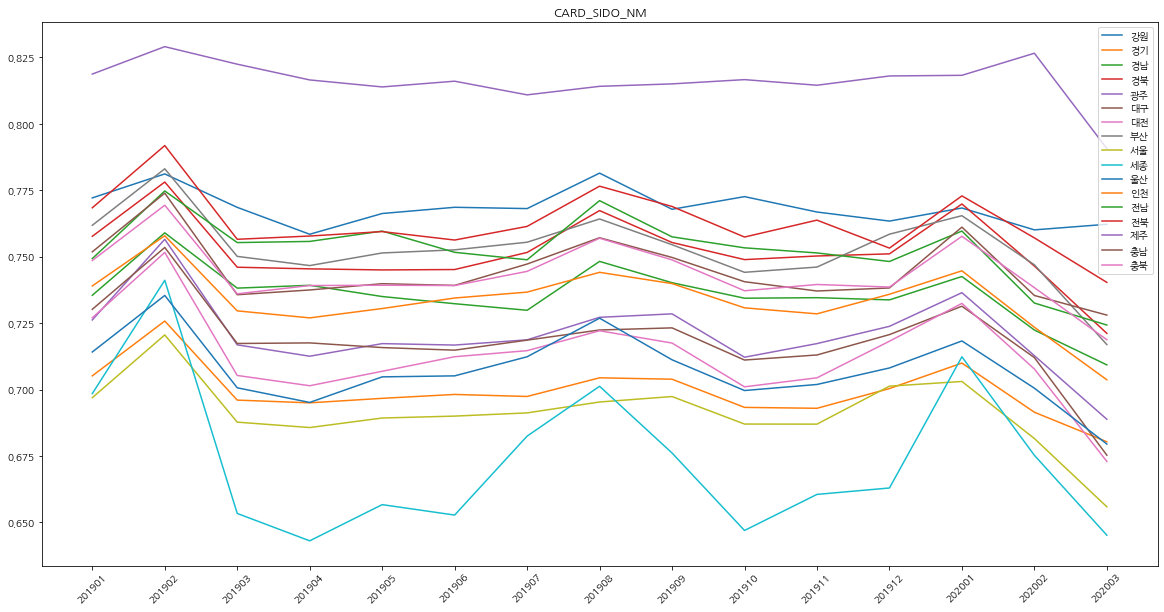

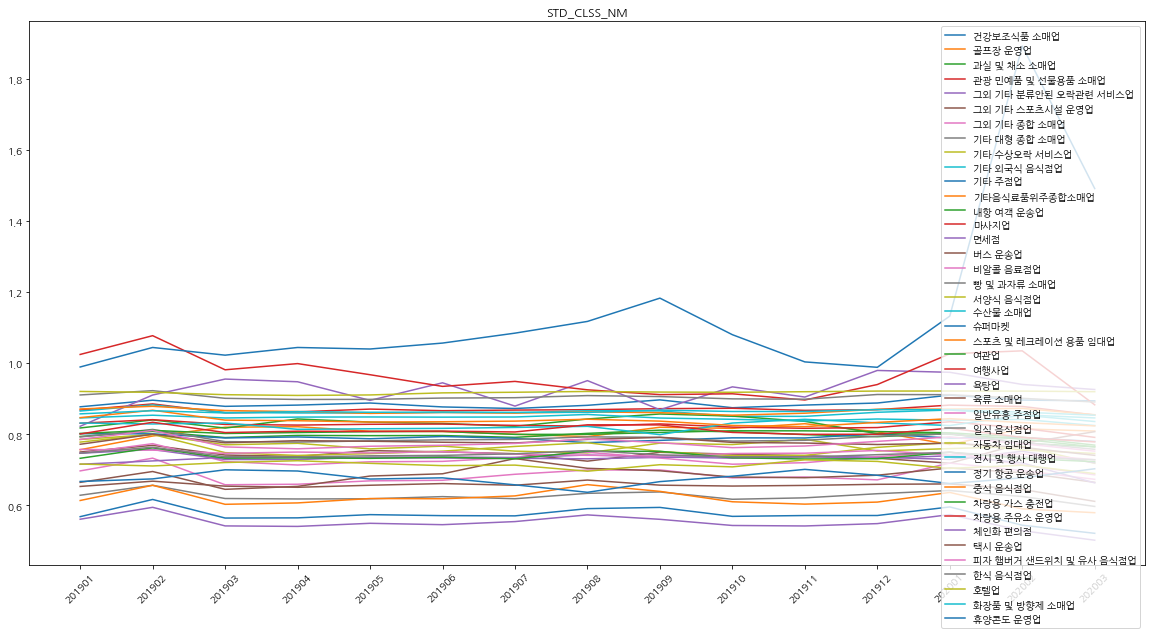

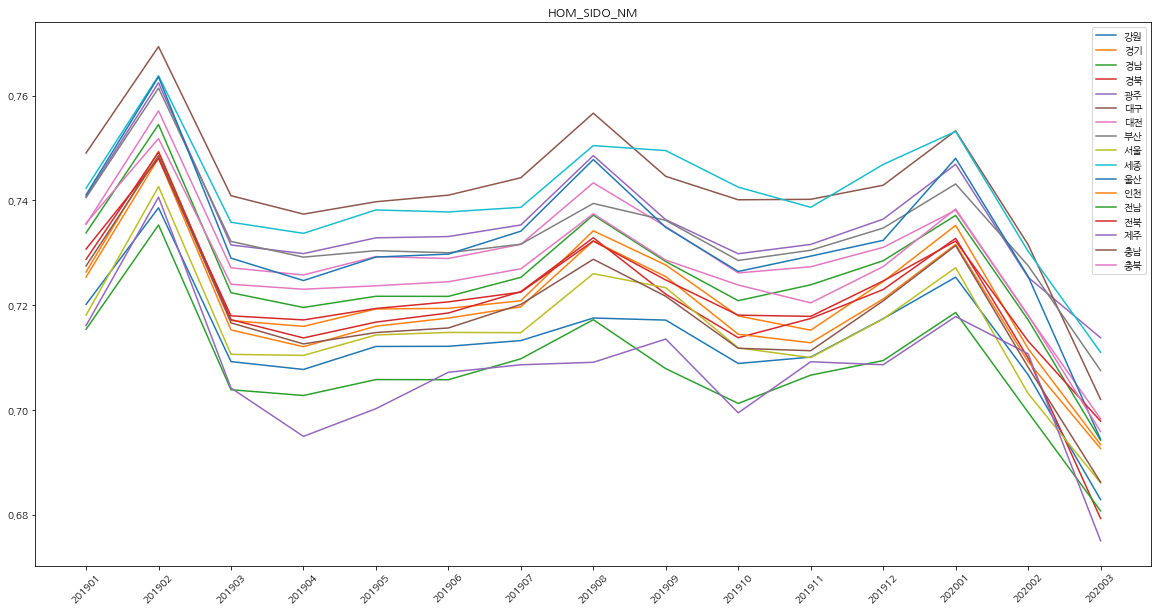

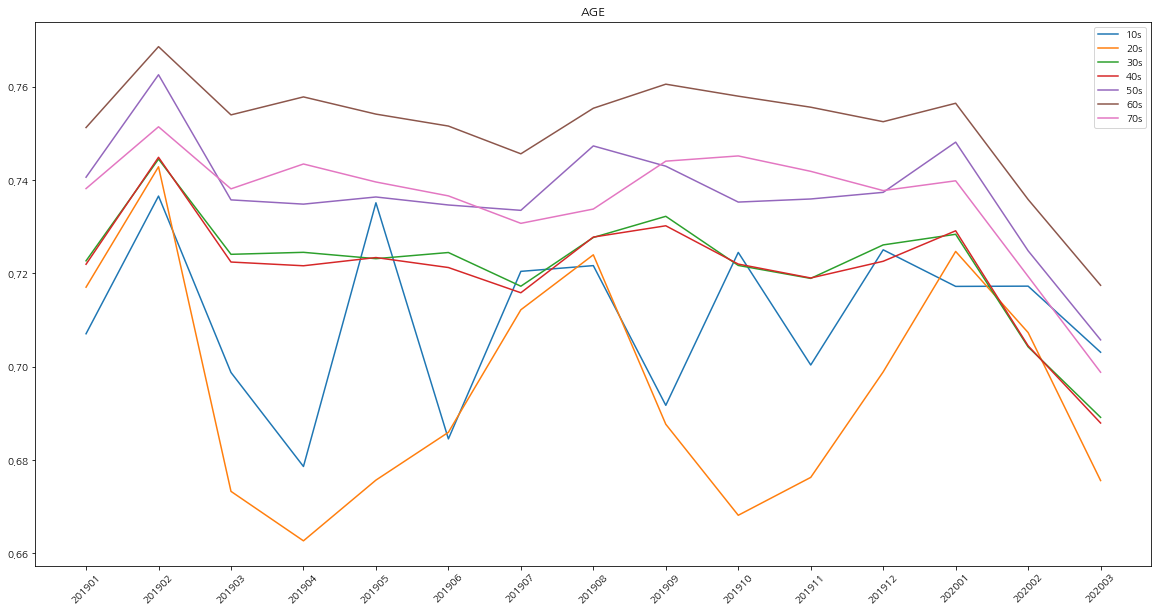

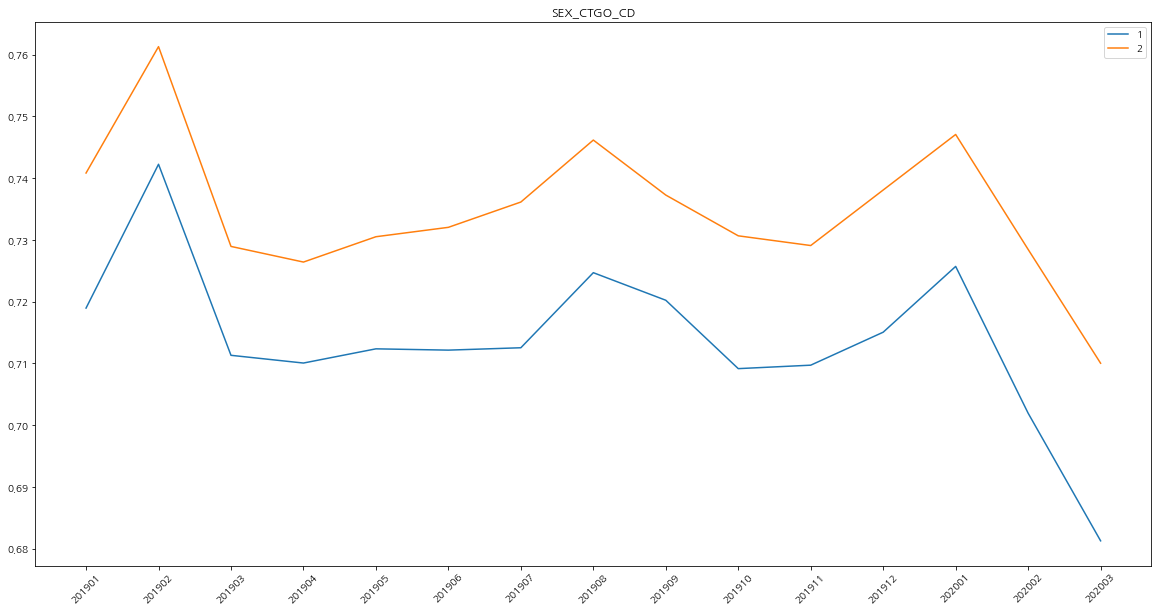

In [35]:
for col in count_columns:
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    tmf_data = for_count_trend[['REG_YYMM',col,'CSTMR_CNT/CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1)
    for col_idx2 in tmf_data:
        se = tmf_data[col_idx2]
        ax.plot(se.index.values.astype('str'), se.values, label=col_idx2[1])
        ax.legend()
        ax.set_xticklabels(se.index.values.astype('str'),rotation=45)
    ax.title.set_text(col)
    plt.show()

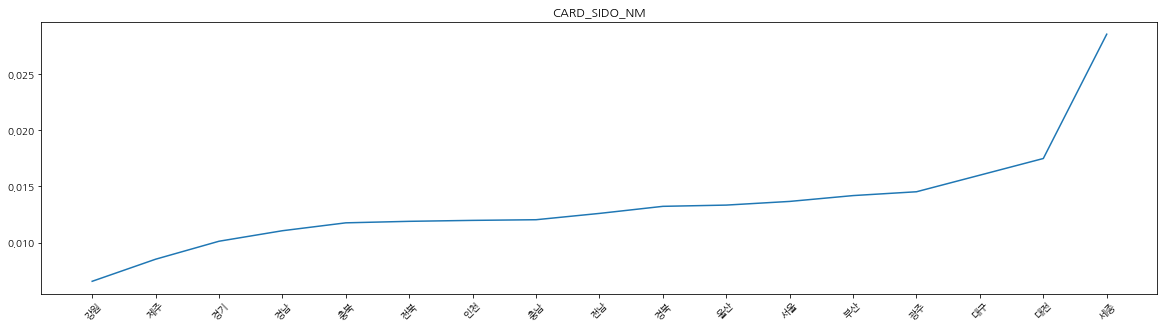

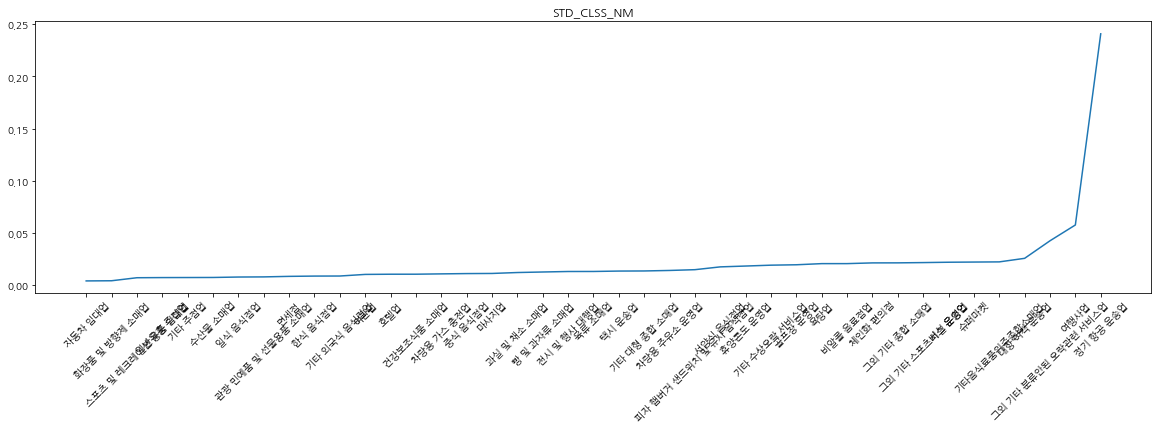

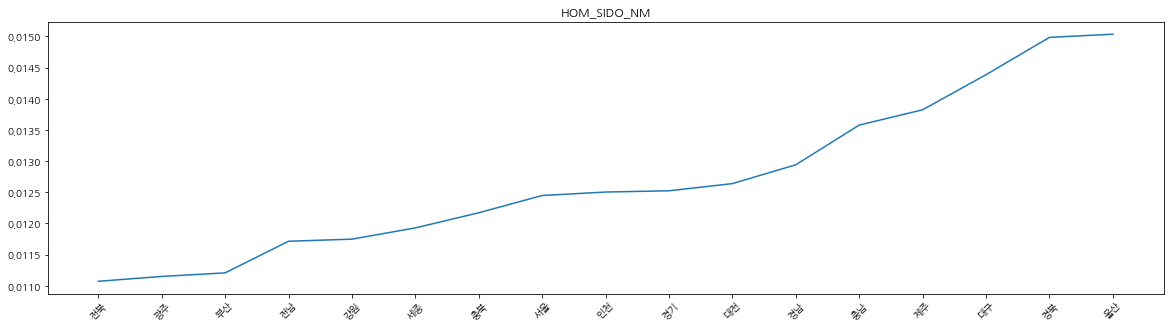

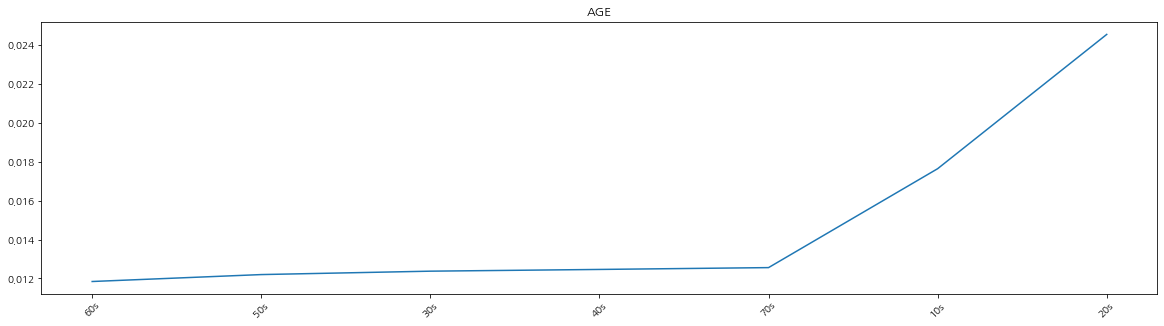

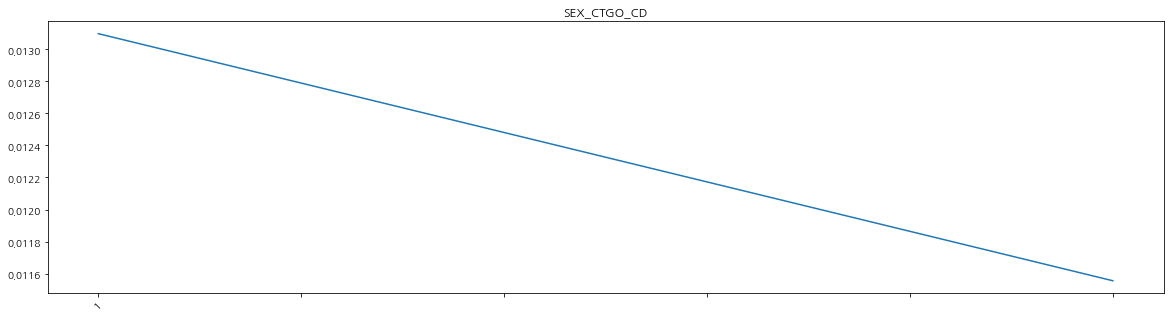

In [36]:
# Standard deviation (use data = pivot table index=Date columns=feature attribute)
# bigger standard deviation -> big change (by date)
for col in count_columns:
    tmp_data = for_count_trend[['REG_YYMM',col,'CSTMR_CNT/CNT']].groupby(['REG_YYMM',col]).mean().unstack(level=1).std(axis=0).sort_values()
    idx_arr = np.array([x[1] for x in tmp_data.index.values])
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(idx_arr,tmp_data.values)
    ax.set_xticklabels(idx_arr,rotation=45)
    ax.title.set_text(col)
    plt.show()
    

In [37]:
# For accuracy
for_count_trend[['REG_YYMM','STD_CLSS_NM','CSTMR_CNT/CNT']].groupby(['REG_YYMM','STD_CLSS_NM']).mean().unstack(level=1).std(axis=0).sort_values()

               STD_CLSS_NM          
CSTMR_CNT/CNT  자동차 임대업                  0.004078
               화장품 및 방향제 소매업            0.004230
               스포츠 및 레크레이션 용품 임대업       0.007124
               일반유흥 주점업                 0.007270
               기타 주점업                   0.007320
               수산물 소매업                  0.007382
               일식 음식점업                  0.007797
               관광 민예품 및 선물용품 소매업        0.007927
               면세점                      0.008435
               한식 음식점업                  0.008703
               기타 외국식 음식점업              0.008768
               여관업                      0.010306
               호텔업                      0.010487
               건강보조식품 소매업               0.010507
               차량용 가스 충전업               0.010822
               중식 음식점업                  0.011101
               마사지업                     0.011224
               과실 및 채소 소매업              0.012112
               빵 및 과자류 소매업              0.012620
               전시 및 행사 대행업      